# Automated Generation of Power Transistors and 3LFC DC-DC Converter

AC3E Microelectronics Team, 2023

SPDX-License-Identifier: Apache-2.0

</br>

#### Team Members 

|Name|Affiliation|IEEE Member|SSCS Member|
|:--:|:----------:|:----------:|:----------:|
| Jorge Marín (Team Coordinator, Postdoctoral Fellow) <br /> Email ID: jorge.marinn@usm.cl|AC3E (Chile)| Yes |Yes|
| Christian Rojas (Professor Advisor) <br /> Email ID: c.a.rojas@ieee.org|AC3E, Universidad Técnica Federico Santa María (Chile)| Yes |No|
| Alfonso Cortés (Master Student) |AC3E, Universidad Técnica Federico Santa María (Chile)| Yes |No|
| Vicente Osorio (Undergraduate Student) |Universidad Técnica Federico Santa María (Chile)| No |No|
| Ítalo Muñoz (Undergraduate Student) |Universidad Técnica Federico Santa María (Chile)| No |No|

## Abstract
Our project focuses on designing and implementing high voltage re-sizable power transistors for a DC-DC buck converter demonstrator based on the three-level flying capacitor converter (3LFCC) architecture, a simple but versatile type of flying-capacitor multi-level (FCML) converter, using the Skywater 130nm CMOS technology (SKY130). This notebook shows the main steps of the analog design flow, namely simulation, layout, verification and post-layout simulation. The result is a of a single converter core design, based on the requirements that the user has given as input.


## 1. Introduction

Recent development in miniaturization of satellites have led to the widespread of the CubeSat standard. These applications have serious volume and weight restrictions and could greatly benefit from fully-integrating DC-DC converters, as they tend to be bulky and heavy. Figure 1 shows the different converters stages in the electronic power system of a CubeSat, where versatile topologies like FCML could prove to be convenient. High current density, reversibility and small passive devices are some of the major challenges. 

</br>

<div>
<center>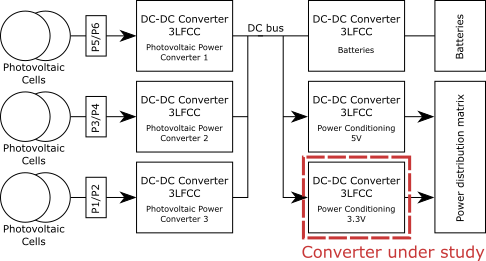</center>
</div>

</br> 

<center>Figure 1: Typical electronic power system (EPS) architecture of a CubeSat</center>

</br> 


Through this Notebook, it will be shown in simulation that a single converter core based on 3-Level architecture can achieve high levels of efficiency at the targeted loads. It is worth noting that this simulation is considering an external passive filter and flying capacitor, but also some inductances for representing the connections to the chip as such. The layout of the core is built using **.tcl** scripts and the simulations are made in **NGSpice**. The simulation results are then processed through **Python** scripts.

### 1.1 About the converter and its implementation

The 3LFCC used is implemented as a buck converter, with 4 states depicted in figure **2**. Depending on the desired voltage output at the load, the rate of appearance of these states will change. When the voltage is higher than $\frac{V_{DD}}{2}$, state 3 won't appear and state 0 will appear twice in each period. Likewise, when the voltage is lower than $\frac{V_{DD}}{2}$, state 3 will apear twice and state 0 will not occur. This is achieved by varying the duty cycle of the switches depending on the reference voltage.

</br>

<div>
<center><img src=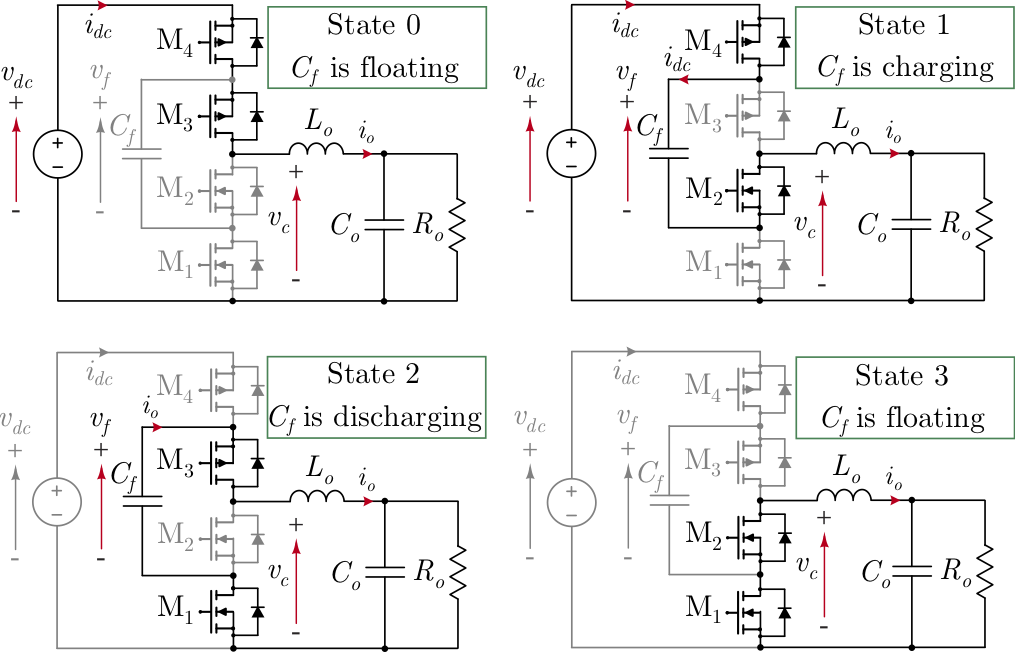 width="450"/></center>
</div>

</br> 

<center>Figure 2: States for the 3LFCC</center>

</br> 

Gate drivers are necessary to achieve the current required to rapidly charge and discharge the gates of the power transistors.  As the gate has to be charged with enough voltage to conduct, gate drivers were implemented. This gate drivers wereThe converter is always implemented with the same gate driver design, that was dimensioned for the biggest converter that this notebook can produce. The level shifter circuit and layout was made designed by our collaboratorsthe team from UCU, Uruguay. An schematic of the level shifter is presented below in **(3)**. Future work will aim to parametrize the layout of the level shifter.

</br>

<div>
<center><img src=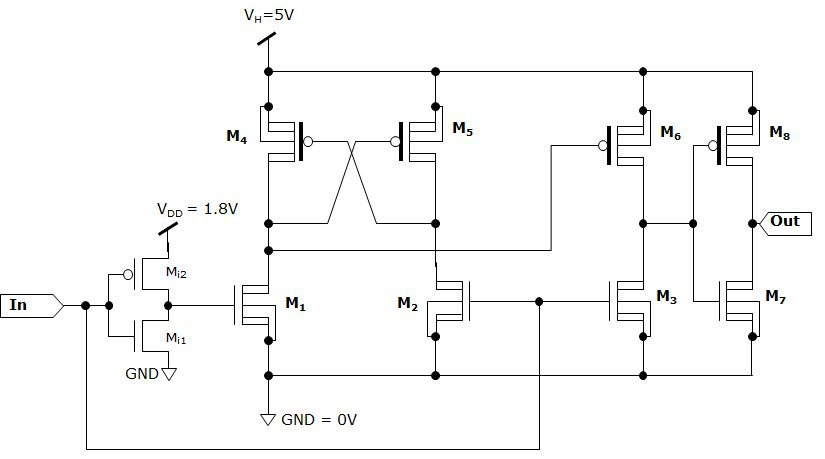 width="450"/></center>
</div>

</br> 

<center>Figure 3: Level Shifter schematic</center>

</br> 



## 2. About the Notebook

### 2.1 The Notebook flow

This Notebook was made in a way that the user can go through the design process step by step. Pre and post-layout characterizations of the power devices are shown, providing early estimates of the system performance. These results are then compared with a pre-layout simulation of complete converter core.could execute every cell part by part, so they could not only get a layout, but a design that compares Pre and Post Layout device characterization and a Pre Layout System performance, giving 3 results assuring the system's behaviour. The Notebook workflow of the Notebook is presented in Figure **2**.

</br>

<div>
<center><img src="Images/nb_workflow.png" width="450"/></center>
</div>

</br> 

<center>Figure 2: Notebook workflow diagram </center>

</br> 


### 2.2 Design choices, layout automation and device characterizations

The hybrid waffle transistor layout was initially chosen to achieve an output current of 300mA, since these devices were used in the Open PMIC project, that was fabricated and tested, proving they can withstand the target current. Other benefits of this particular layout are that these transistors can handle higher currents and their on-state resistance decreases faster when increasing the area, in comparison to traditional finger layouts. In this work the layout of the waffle transistors was parametrized so that the target output current can be changed by the user. 
With the output current and voltage specifications, the required on-state resistance for the NMOS and PMOS transistors can be determined. In order to estimate the multiplicity of the required devices, the relation between the multiplicity and Ron was modelled by generating and characterizing reference transistors. Figure **3** shows an example of the setup used to measure Ron and drain-source current for different multiplicities of an NMOS and 
 $V_{GS}=5V$. 
</br>

<div>
<center><img src=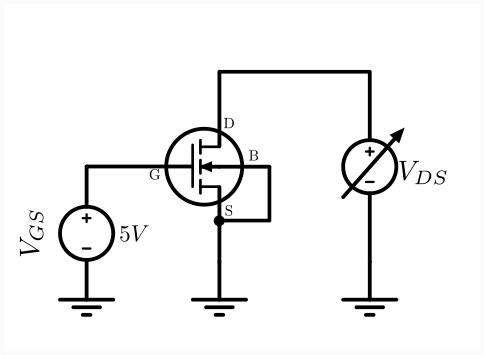 width="300"/></center>
</div>

</br> 

<center>Figure 3: DC simulation setup for measuring current and switching resistance (Variable $V_{DS}$) </center>

</br> 


The resistance and current were measured at the point where the device was starting to saturate ($i.e.$ at the maximum curvature point between linear and saturation regions). This is shown in figure **4**. 

</br> 

</br>

<div>
<center><img src=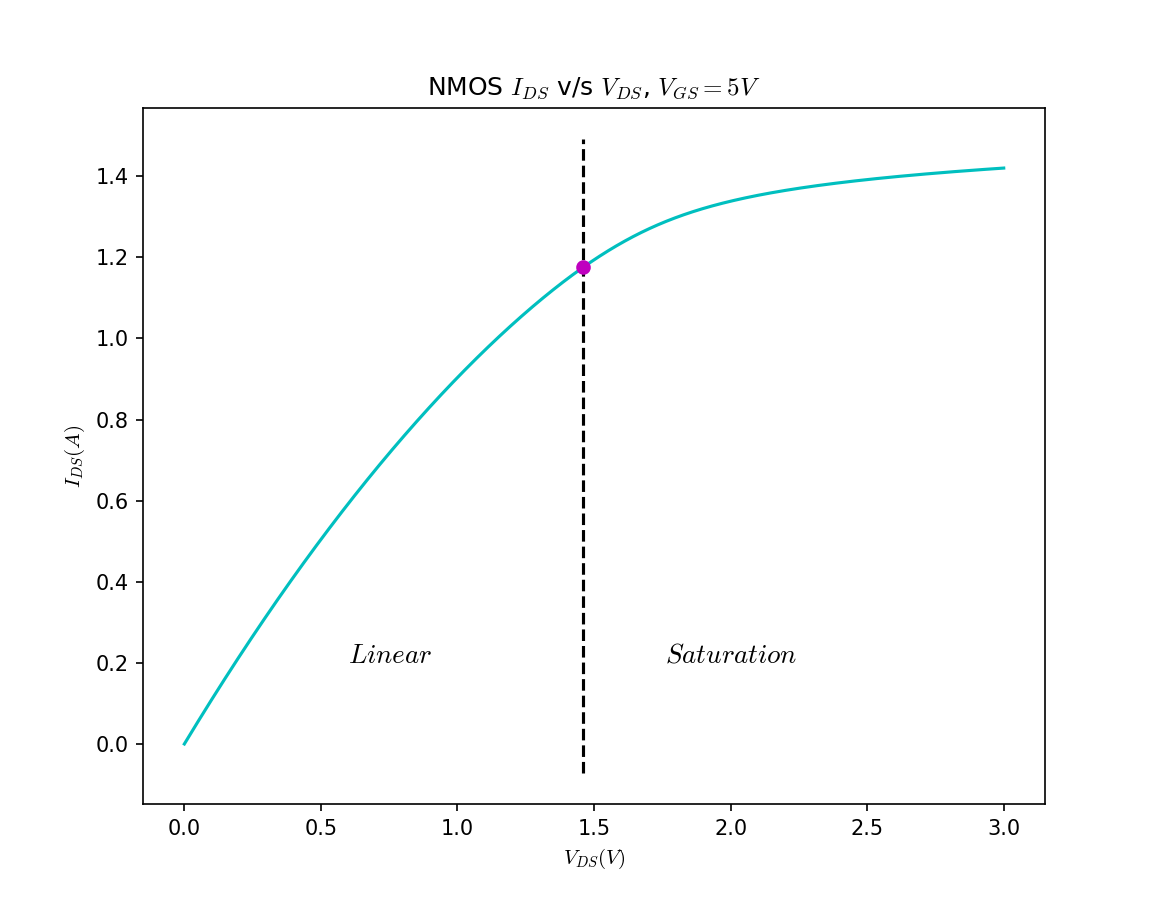 width="450"/></center>
</div>

</br> 

<center>Figure 4: Point of measurement for switching resistance $R_{ON}$ and $I_{DS}$ current</center>

</br> 

</br> 


With this data, a curve fit was made to define the relation between multiplicity and ON resistance, but also between multiplicity and maximum current. This curves were made for both $|V_{GS}|=2.5V$ and $|V_{GS}|=5V$, as both corner cases are present in the converter. The curve fittings for a NMOS device with $|V_{GS}|=5V$ can be seen in Figures **5** and **6**.
</br>

<div>
<center><img src=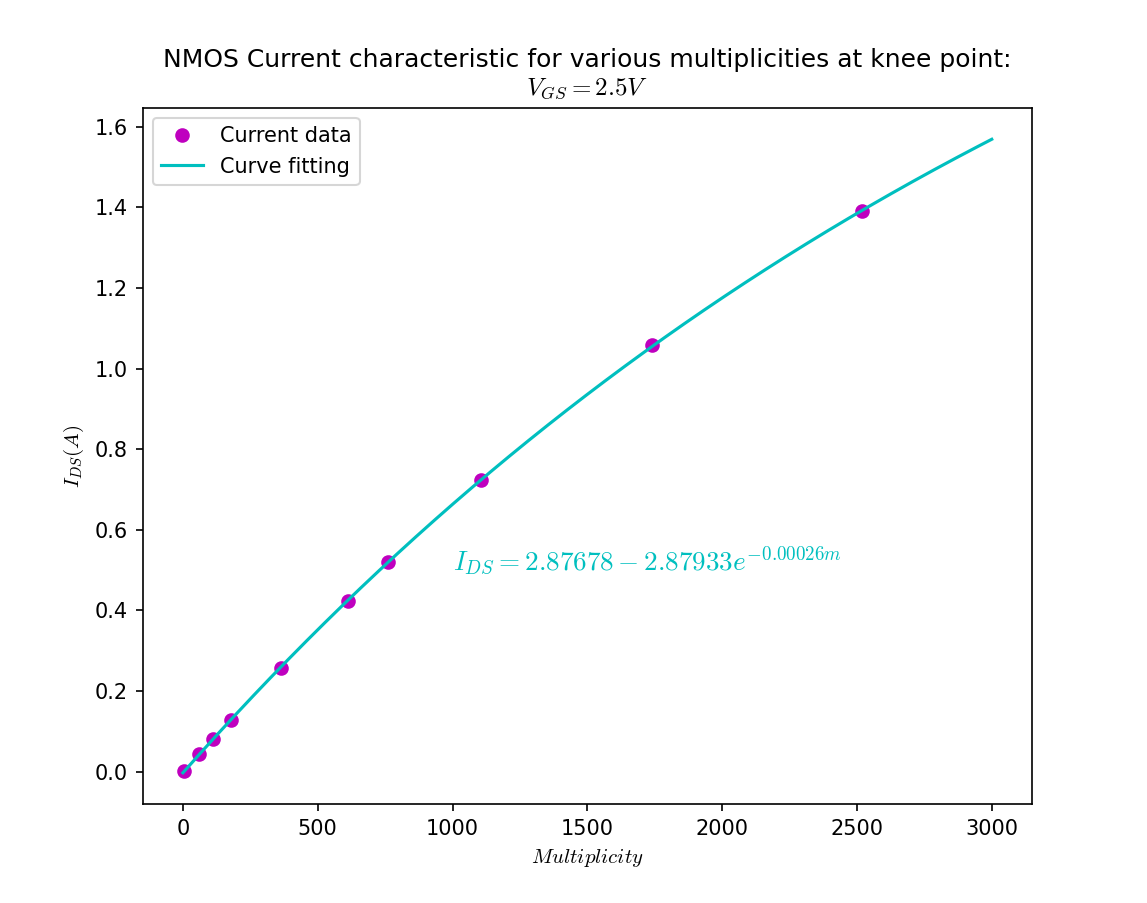 width="450"/></center>
</div>

</br> 

<center>Figure 5: Current $I_{DS}$ curve fitting for various multiplicities</center>

</br> 

<div>
<center><img src=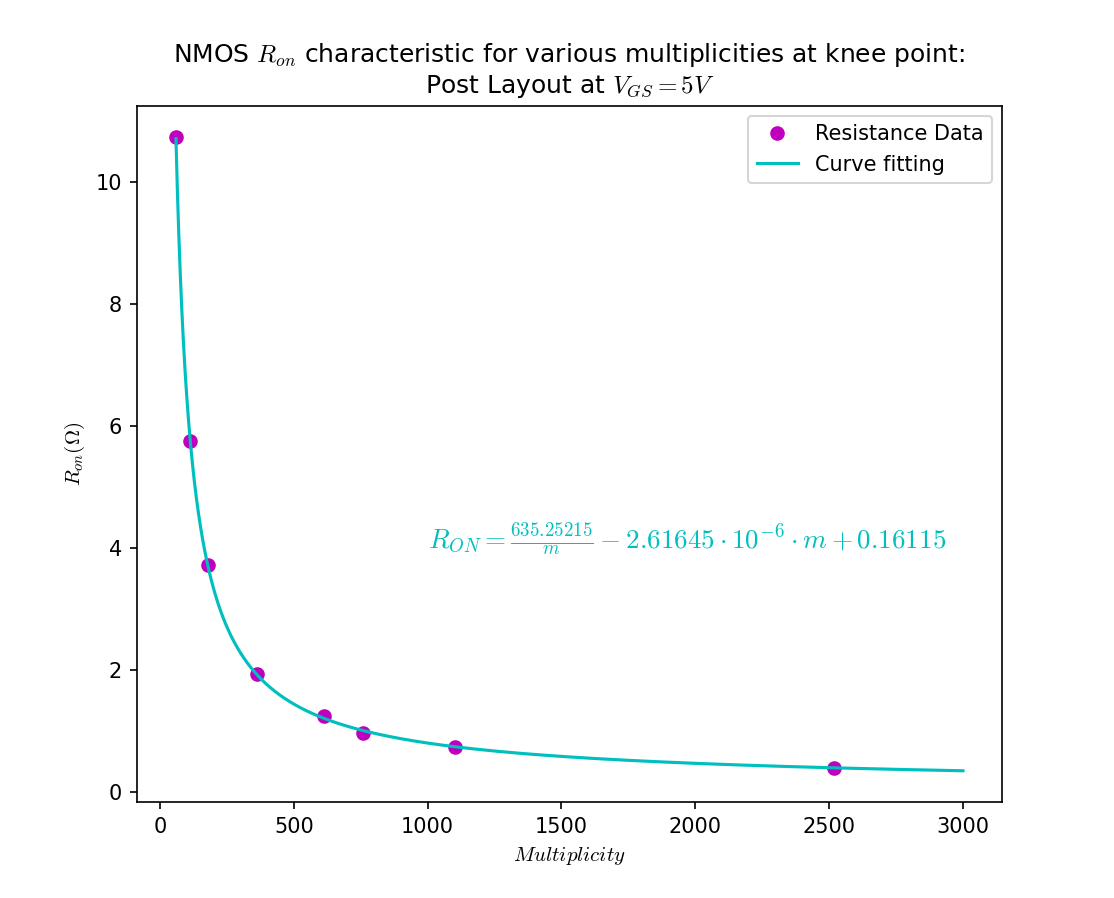 width="450"/></center>
</div>

</br> 

<center>Figure 6: Switching Resistance $R_{ON}$ curve fitting for various multiplicities</center>

</br> 

The fitted curves can be used to dimension the power transistors, as done in section 4 below. The user inputs the desired output voltage and current, the switching frequency and a maximum area limit. Then, the algorithm will first determine if the area of the minimum-size converter that can withstand the target current (in linear region), as shown in Figure **7**. If possible, the multiplicity of the devices will be increased until the area limit is reached (Figure **8**). In this process, the on-state resistance of the PMOS transistors is chosen to be as close as possible to the resistance of the NMOS transistors. It is also necessary to consider that the automated layout generation method for the waffle transistors allows for a discrete universe of possible layouts. 

</br> 

<div>
<center><img src=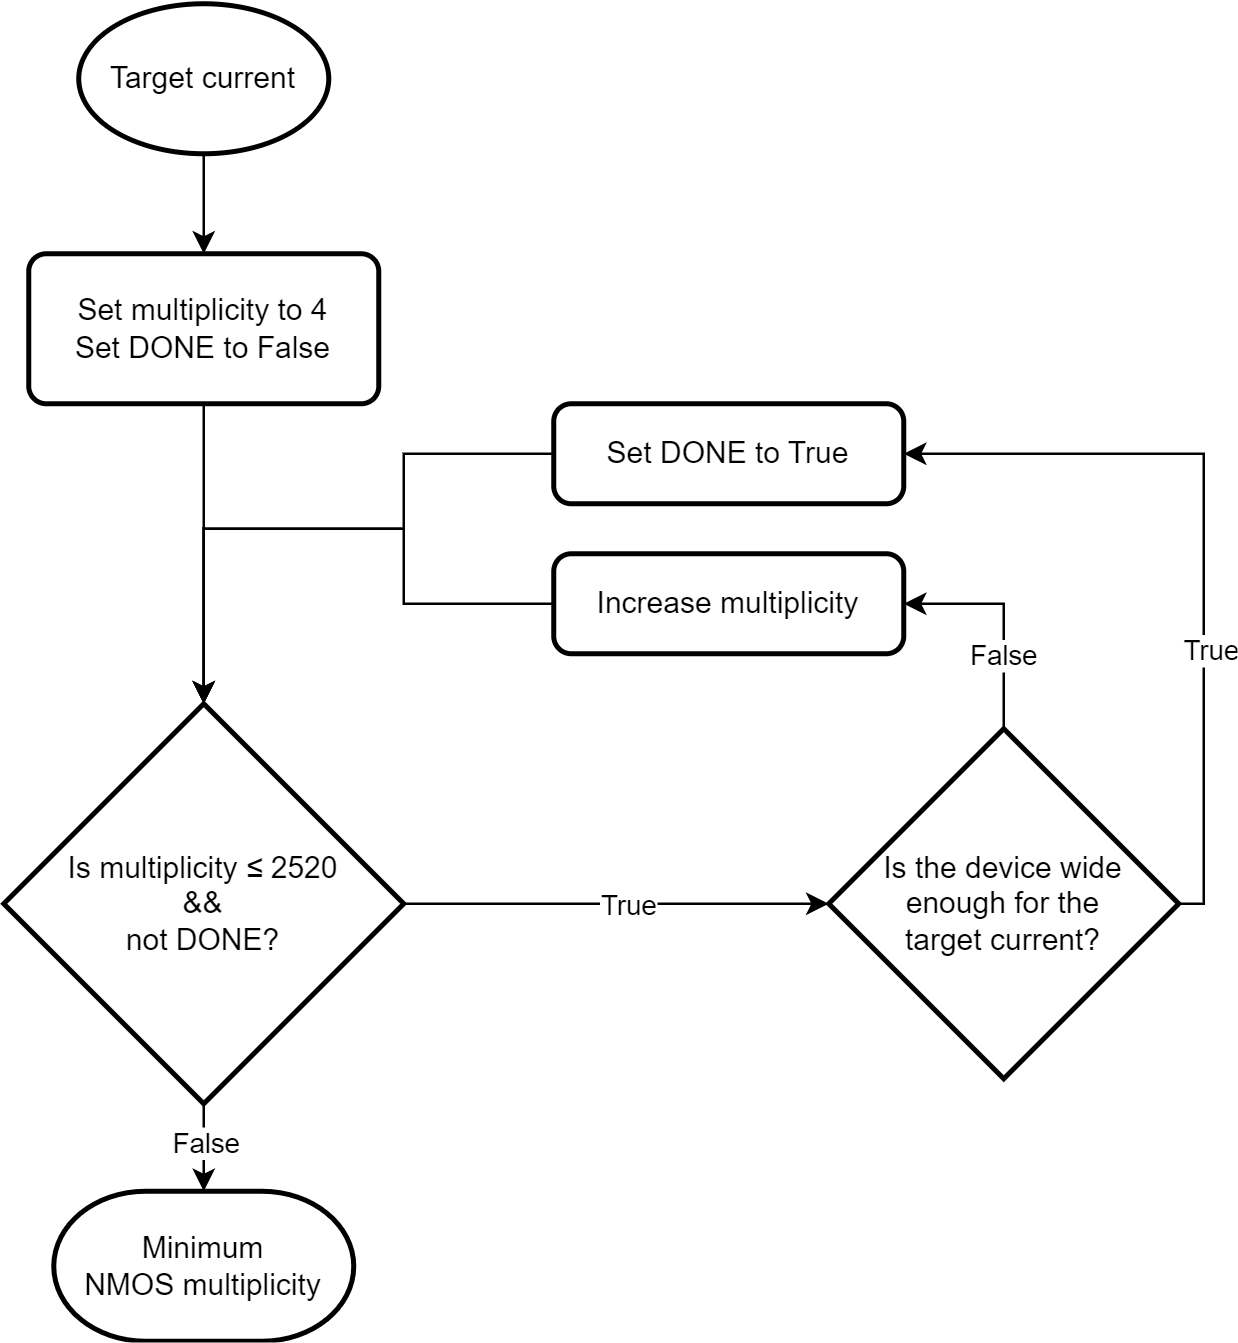 width="450"/></center>
</div>

</br> 

<center>Figure 7: Flow diagram of the process to determine the minimum area, by estimating the minium multiplicity necessary to manage the output current.</center>

</br> 

</br> 

<div>
<center><img src=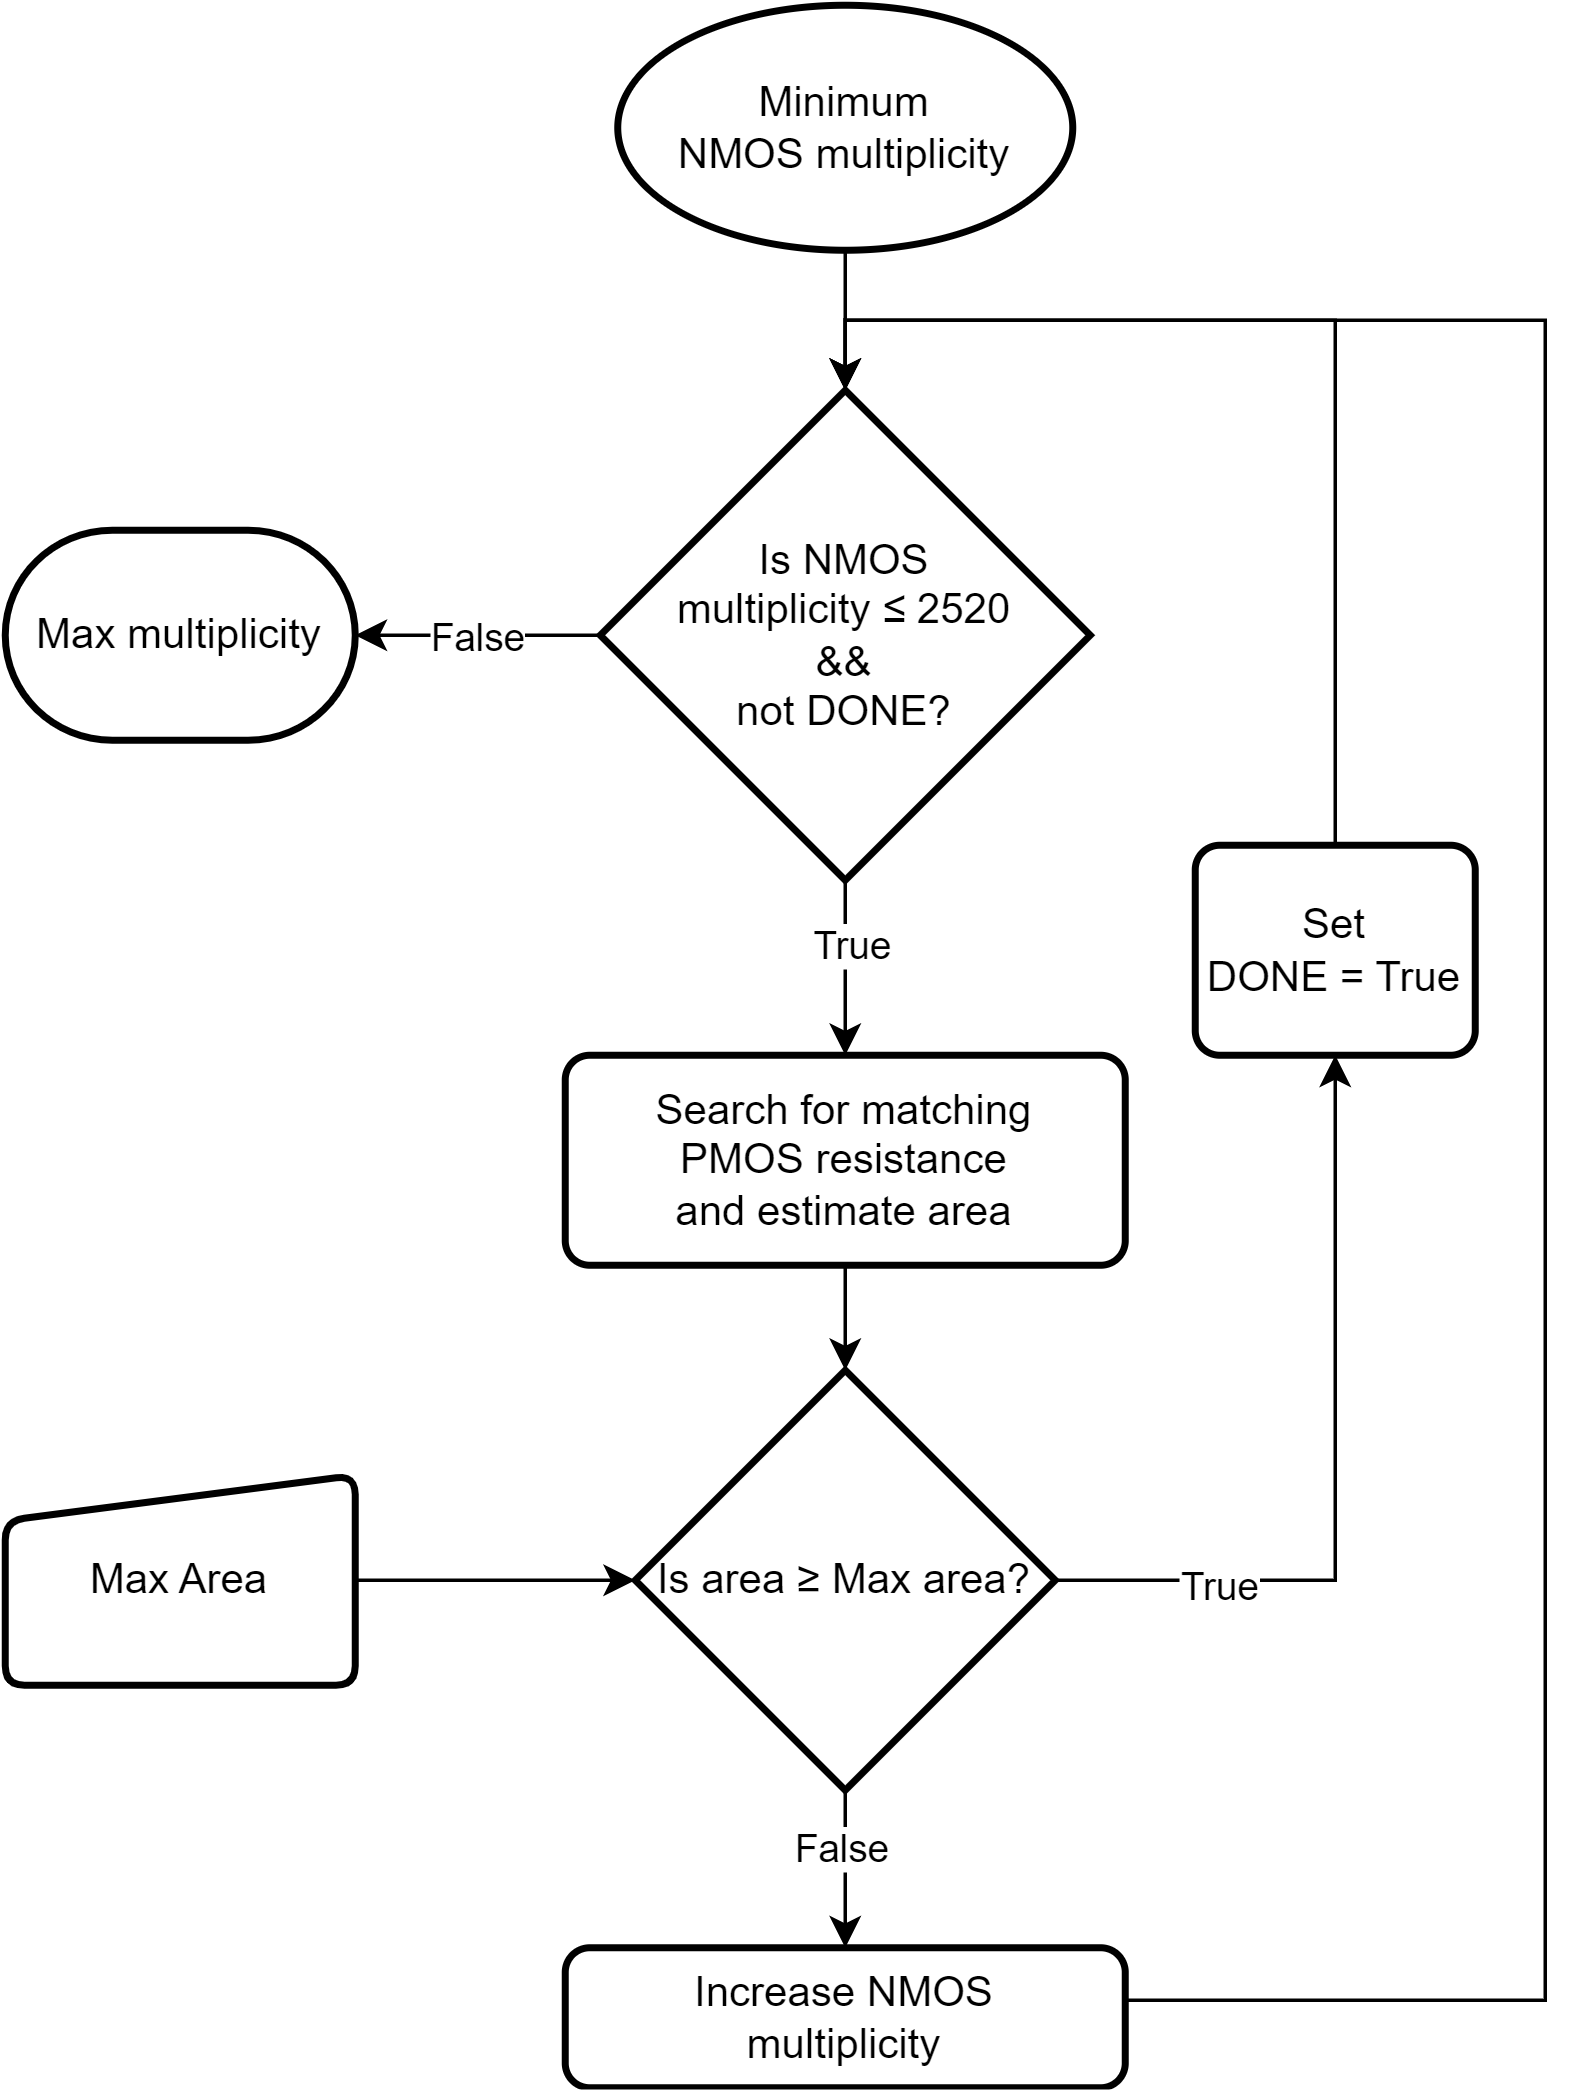 width="450"/></center>
</div>

</br> 

<center>Figure 8: Flow diagram of the process to find the maximium converter size in the available area.</center>

</br> 


Next, the data will be used by the Notebook to produce a layout for each device, and then a layout for the converter core. The automation process is achieved by dissecting the original layout made by Weston Braun for the Open PMIC project. This layout was reduced to primitive cells (or *tiles*), that are instanciated as a matrix depending on the desired multiplicity for the device. It is worth noting that the hybrid waffle of $nxn$ cells will have a multiplicity $m$ determined by the expression $m=n\cdot (n-1) \cdot 2$, which is derived from the transistors that appear in the intersections of the waffle cells. An image showing a base source inner cell of the layout for a NMOS transistor can be seen in **(9)**. An animation of the layout automation is shown in **(10)**. As the layout was for a pair number of cells, at this moment this notebook can only make hybrid waffles of a pair number of $n$.

<div>
<center><img src=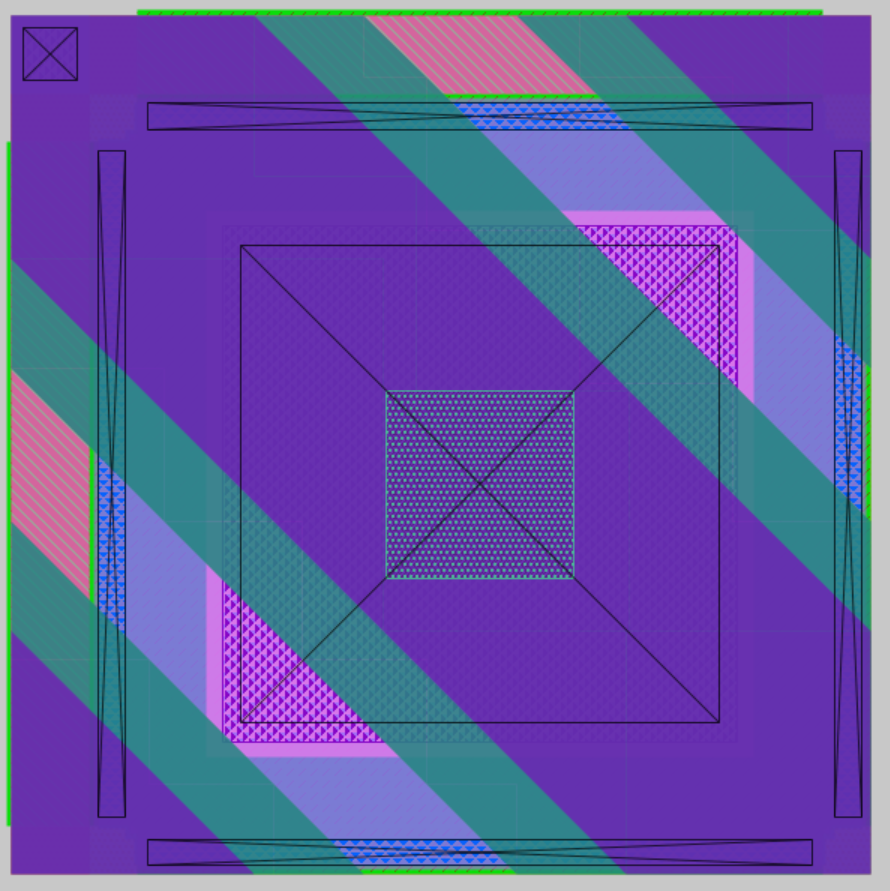 width="300"/></center>
</div>

</br> 

<center>Figure 9: Base source inner cell for a NMOS hybrid waffle layout</center>

</br> 

<center><img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExNGFiYzZjMzg4NDNiNTgwMTE3MmEzNTgxNDQ3ZmU3ODJhOWI2NjY3NiZjdD1n/C5TfkY50x6tfMHv00D/giphy.gif" width="300"/></center></p>

</br> 

<center>Figure 10: Automation process for a NMOS hybrid waffle layout</center>

</br> 


Then, various simulations will be made to characterize each device. This includes using the previous setup shown for the on-state resistance measurement, but also a setup for characterizing gate capacitance, as seen below in Figure **9**. To measure the gate capacitance, the time constant was determined by identifying the point where the gate voltage $V_G$ reached $63.2\%$ of the source voltage, then it was divided by the gate resistance, as shown in **(10)**.


</br>

<div>
<center><img src=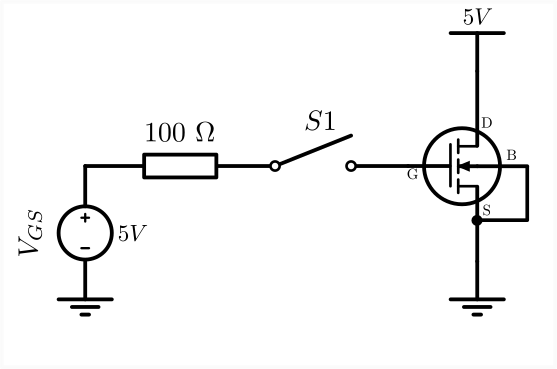 width="300"/></center>
</div>

</br> 

<center>Figure 11: Transient simulation setup for measuring gate capacitance</center>

</br> 

</br>

<div>
<center><img src=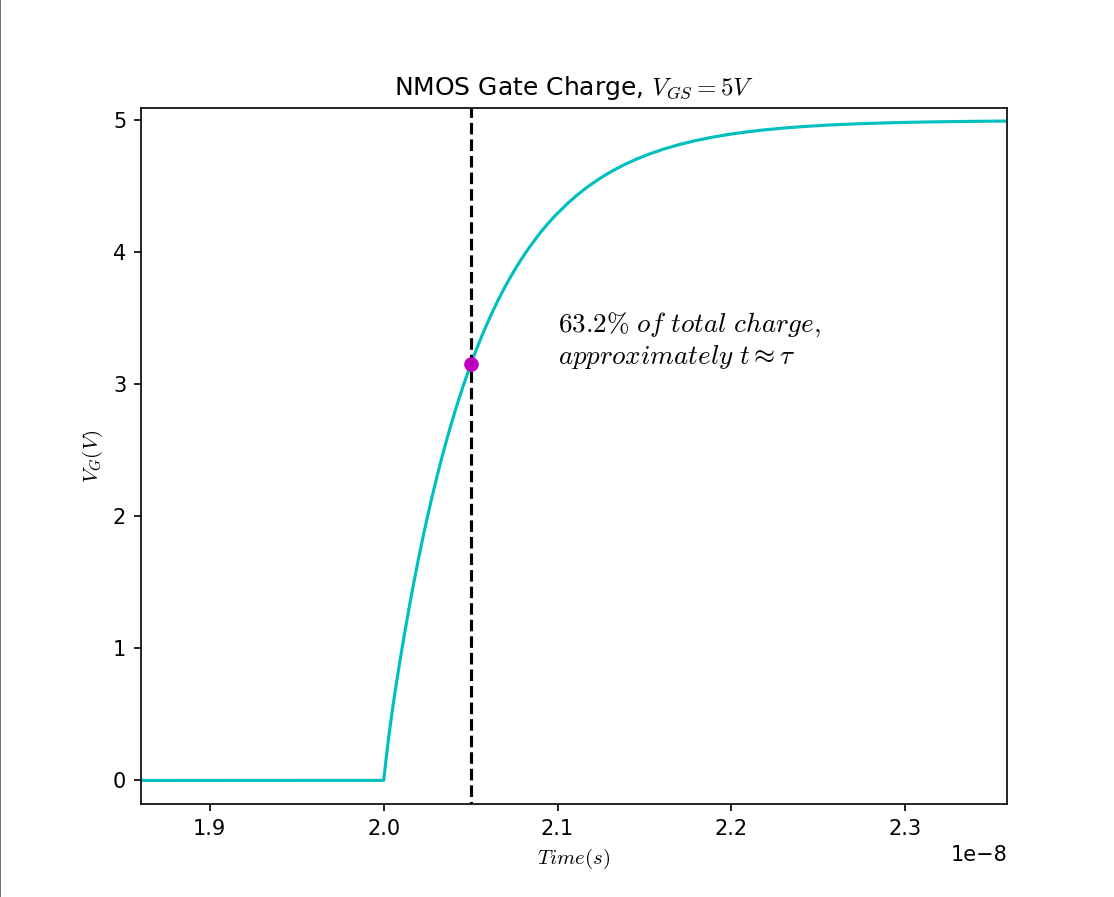 width="450"/></center>
</div>

</br> 

<center>Figure 12: Point of measurement for gate capacitance $C_{gg}$</center>

</br> 


## 3. Tools and input files

### 3.1 Install tools and dependencies

By executing the block below, you may install everything that will be necessary to run this notebook. It is highly recommended to run this notebook in **Google Colab**, as it is thought to be used in that environment.

In [1]:
import os
import pathlib
import sys
!apt install -y time build-essential
!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
%env CONDA_PREFIX={CONDA_PREFIX}
!echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
site_package_path = conda_prefix_path / 'lib/python3.7/site-packages'
sys.path.append(str(site_package_path.resolve()))
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                    	--channel litex-hub \
                    	--channel main \
                    	open_pdks.sky130a \
                    	magic \
                    	netgen \
                    	klayout \
                        ngspice
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                    	--channel conda-forge \
                    	svgutils
!python -m pip install pyyaml click gdstk --no-binary gdstk
!python -m pip install pandas matplotlib base64 cairosvg
PATH = os.environ['PATH']
%env PDK_ROOT={CONDA_PREFIX}/share/pdk
PDK_ROOT = os.environ['PDK_ROOT']
%env PATH={PATH}:{CONDA_PREFIX}/bin
LD_LIBRARY_PATH = os.environ.get('LD_LIBRARY_PATH', '')
%env LD_LIBRARY_PATH={LD_LIBRARY_PATH}:{CONDA_PREFIX}/lib/python3.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.8ubuntu1.1).
The following NEW packages will be installed:
  time
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 26.2 kB of archives.
After this operation, 79.9 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 time amd64 1.7-25.1build1 [26.2 kB]
Fetched 26.2 kB in 0s (86.4 kB/s)
Selecting previously unselected package time.
(Reading database ... 128288 files and directories currently installed.)
Preparing to unpack .../time_1.7-25.1build1_amd64.deb ...
Unpacking time (1.7-25.1build1) ...
Setting up time (1.7-25.1build1) ...
Processing triggers for man-db (2.9.1-1) ...
bin/micromamba
env: CONDA_PREFIX=/content/conda-env
/bin/bash: /content/conda-env/conda-meta/pinned: No such file or directory

                                           __
          __  ______ ___  _

### 3.2 Downloading input files

This code block will clone all the necessary input files for the project to work (template **.tcl** and **.spice** files and **.mag** subcells)

In [2]:
!git clone -b input_files https://github.com/AlfonsoUSM/3LFCC_CAC.git input_files

Cloning into 'input_files'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 265 (delta 105), reused 220 (delta 64), pack-reused 0
Receiving objects: 100% (265/265), 12.58 MiB | 10.01 MiB/s, done.
Resolving deltas: 100% (105/105), done.


## 4. Design and Simulation

By using **Python**, the notebook will design according to the user inputs a suitable DC-DC buck converter. Then, it will simulate the cells to have a more certain approximation of the real performance. Next, it will proceed to make the layout for the transistors for then simulating an efficiency that gets nearer to the final results. Finally, it will run a transient simulation to characterize the system as a whole and then generate the layout for a converter core.

### 4.1 Converter Design

In [4]:
import numpy as np

alpha=float(input('Percentage of period for dead time: '))
alpha/=100
v_ref=float(input('Output voltage in V: '))
freq=float(input('Operation frequency in MHz: '))
period=round(1/freq,2)*1000
freq*=1_000_000
v_dc=5 #the level shifter is designed for a dc voltage output of 5V and a dc voltage input of 1.8V
dutycycle=round(1 - v_ref/v_dc,3)
native_iout=float(input('Enter desired current output in mili-amperes (mA): '))
big=round(native_iout/1000, 5)
ripple=input('Desired ripple? (default is 6.7%): ')
if ripple=='' or ripple==' ':
    print('\tSetting default value')
    ripple=0.22
elif float(ripple)>=0:
    print('\tSetting value to',ripple,'%')
    ripple=float(ripple)*0.01*3.3
else:
    print('\tInvalid value, setting to default')
    ripple=0.22

fc_value=int(round(big/(freq*ripple),9)*10**(9))
print('\tThis will require a flying cap of',fc_value,'nF')

p_mult=0
n_mult=0
p_cell=0
n_cell=0
vdd=5
guard_width=48
guard_offset_x=11.25
size=5.5


def lin_funct(m, a, b):
     return round(a*m + b,5) 

def cap_loss(cap, v, f):
     return round(cap*v*v*f,5) 

def r_mult(m, a, b, c):
    return round(a/m + b*m + c,5)

def mult_r(r, a, b):
    return round(a/r + b/(r**2),5)

def curr_funct(m, a, b, c):
     return round((1-a*np.exp(-b*m)) + c,5) 

def guard_side(n, size, off, w):
     return round((n-1)*size + 2*(off + w) - 5,1)

nmos_a=2.593047752959509
nmos_b=0.0003079211125150696
nmos_c=1.5895443408558942

n=2
flag=True

while n<=36 and flag:
    mult=n*(n-1)*2
    cand=curr_funct(mult, nmos_a, nmos_b, nmos_c)
    if big<=cand:
      flag=False
      n_mult=mult
      n_cell=n
    else:
        n+=2

res_data=np.array([1176.1717825605258, 3.1992633969970516e-05, 0.17103891844966482])
inv_data=np.array([2527.905648043019, 5820.143508748493])



user_area=float(input('Enter max area in square microns (um^2): '))

n=n_cell
flag=True
little=float('inf')
real_pcell=2
solve=True
real_area=0
while n<=36 and flag:
   cand_nmult=n*(n-1)*2
   mos_res=r_mult(cand_nmult, *res_data)
   cand_pmult=mult_r(mos_res, *inv_data)
   cand_pcell=2
   little=float('inf')
   while cand_pcell<=48:
      real_pmult=cand_pcell*(cand_pcell-1)*2
      diff=real_pmult-cand_pmult
      if abs(diff)<=little:
         real_pcell=cand_pcell
         true_pmult=real_pmult
         little=abs(diff)
      cand_pcell+=2
   n_area=2*guard_side(n, size, guard_offset_x, guard_width)**2
   p_area=2*guard_side(real_pcell, size, guard_offset_x, guard_width)**2
   cand_area=n_area+p_area
   if cand_area>user_area:
      flag=False
   else:
      real_area=cand_area
      p_cell=real_pcell
      p_mult=true_pmult
      n_cell=n
      n_mult=cand_nmult
   n+=2

if real_area!=0:
   print('\nThe multiplicity for achieving the desired current and area is',p_mult,'for the PMOS device and', n_mult, 'for the NMOS device.')
   print('This will produce a DC-DC converter with an area of',real_area,'um^2')
else:
   print('\nThe minimum multiplicity for achieving the desired current and area is',true_pmult,'for the PMOS device and', n_mult, 'for the NMOS device.')
   print('This will produce a DC-DC converter with an area of',cand_area,'um^2')
   print('This does not meet the user specs')


Percentage of period for dead time: 2
Output voltage in V: 3.3
Operation frequency in MHz: 1
Enter desired current output in mili-amperes (mA): 5
Desired ripple? (default is 6.7%): 
	Setting default value
	This will require a flying cap of 23 nF
Enter max area in square microns (um^2): 100000

The multiplicity for achieving the desired current and area is 112 for the PMOS device and 60 for the NMOS device.
This will produce a DC-DC converter with an area of 85970.0 um^2


### 4.2 Device-Level 

#### 4.2.1 Pre Layout Device Characterization

The next block will generate **SPICE** files for simulating the switch resistance for both NMOS and PMOS devices. This is a reference previous to the layout, so it does not contemplate layout parasitics.

In [5]:
### SPICE code generation ###

if n_mult<=4:
    n_prec='50f'
    n_off='1p'
    n_off_calc=10**(-12)
    n_on=round(157/180*n_mult*2.85)
    n_sim=n_on+1
    n_on=str(n_on)+'p'
    n_sim=str(n_sim)+'p'
elif n_mult<=112:
    n_prec='100f'
    n_off='1p'
    n_off_calc=10**(-12)
    n_on=round(157/180*n_mult*1.6)
    n_sim=n_on+1
    n_on=str(n_on)+'p'
    n_sim=str(n_sim)+'p'
elif n_mult<=1104:
    n_prec='1p'
    n_off='100p'
    n_off_calc=10**(-10)
    n_on=round(157/180*n_mult*1.6)
    n_sim=n_on+100
    n_on=str(n_on)+'p'
    n_sim=str(n_sim)+'p'
elif n_mult<=2520:
    n_prec='1p'
    n_off='1n'
    n_off_calc=10**(-9)
    n_on=round(157/180*n_mult*1.6*10**(-3),1)
    n_sim=n_on+1
    n_on=str(n_on)+'n'
    n_sim=str(n_sim)+'n'


if p_mult<=4:
    p_prec='50f'
    p_off='1p'
    p_off_calc=1*10**(-12)
    p_on=round(157/180*p_mult*2.85)
    p_sim=p_on+1
    p_on=str(p_on)+'n'
    p_sim=str(p_sim)+'n'
elif p_mult<=112:
    p_prec='100f'
    p_off='1p'
    p_off_calc=1*10**(-12)
    p_on=round(157/180*p_mult*1.6)
    p_sim=p_on+1
    p_on=str(p_on)+'p'
    p_sim=str(p_sim)+'p'
elif p_mult<=480:
    p_prec='1p'
    p_off='100p'
    p_off_calc=1*10**(-10)
    p_on=round(157/180*p_mult*1.6)
    p_sim=p_on+100
    p_on=str(p_on)+'p'
    p_sim=str(p_sim)+'p'
elif p_mult<=4512:
    p_prec='7p'
    p_off='1n'
    p_off_calc=1*10**(-9)
    p_on=round(157/180*p_mult*1.6*10**(-3),1)
    p_sim=p_on+1
    p_on=str(p_on)+'n'
    p_sim=str(p_sim)+'n'

###R_on
nmos_spice=open('input_files/SPICE_files/NMOS/PRELAYOUT/NMOS_R_on_calc_PRELAYOUT.spice','r')
nmos_data=[]
for line in nmos_spice:
    nmos_data.append(line)
nmos_spice.close()
nmos_data[13]='.param mul = '+str(n_mult)+'\n'
nmos_data[15]='.lib '+PDK_ROOT+'/sky130A/libs.tech/ngspice/sky130.lib.spice tt\n'
nmos_spice=open('input_files/SPICE_files/NMOS/PRELAYOUT/NMOS_R_on_calc_PRELAYOUT.spice','w')
for line in nmos_data:
    nmos_spice.write(line)
nmos_spice.close()

pmos_spice=open('input_files/SPICE_files/PMOS/PRELAYOUT/PMOS_R_on_calc_PRELAYOUT.spice','r')
pmos_data=[]
for line in pmos_spice:
    pmos_data.append(line)
pmos_spice.close()
pmos_data[11]='.param mul = '+str(p_mult)+'\n'
pmos_data[13]='.lib '+PDK_ROOT+'/sky130A/libs.tech/ngspice/sky130.lib.spice tt\n'
pmos_spice=open('input_files/SPICE_files/PMOS/PRELAYOUT/PMOS_R_on_calc_PRELAYOUT.spice','w')
for line in pmos_data:
    pmos_spice.write(line)
pmos_spice.close()


###Gate cap
nmos_spice=open('input_files/SPICE_files/NMOS/PRELAYOUT_CAP/NMOS_cap_calc_PRELAYOUT.spice','r')
nmos_data=[]
for line in nmos_spice:
    nmos_data.append(line)
nmos_spice.close()
nmos_data[3]='+ sa=0 sb=0 sd=0 mult='+str(n_mult)+' m='+str(n_mult)+'\n'
nmos_data[4]='VG VP GND PULSE(0 {VGS} '+n_off+' 0 0 '+n_on+' '+n_sim+')\n'
nmos_data[25]='tran '+n_prec+' '+n_sim+'\n'
nmos_data[17]='.lib '+PDK_ROOT+'/sky130A/libs.tech/ngspice/sky130.lib.spice tt\n'
nmos_spice=open('input_files/SPICE_files/NMOS/PRELAYOUT_CAP/NMOS_cap_calc_PRELAYOUT.spice','w')
for line in nmos_data:
    nmos_spice.write(line)
nmos_spice.close()

pmos_spice=open('input_files/SPICE_files/PMOS/PRELAYOUT_CAP/PMOS_cap_calc_PRELAYOUT.spice','r')
pmos_data=[]
for line in pmos_spice:
    pmos_data.append(line)
pmos_spice.close()
pmos_data[1]='VG VP GND PULSE(0 {VGS} '+p_off+' 0 0 '+p_on+' '+p_sim+')\n'
pmos_data[24]='tran '+p_prec+' '+p_sim+'\n'
pmos_data[10]='+ sa=0 sb=0 sd=0 mult='+str(p_mult)+' m='+str(p_mult)+'\n'
pmos_data[16]='.lib '+PDK_ROOT+'/sky130A/libs.tech/ngspice/sky130.lib.spice tt\n'
pmos_spice=open('input_files/SPICE_files/PMOS/PRELAYOUT_CAP/PMOS_cap_calc_PRELAYOUT.spice','w')
for line in pmos_data:
    pmos_spice.write(line)
pmos_spice.close()


The next blocks will run the simulation for the NMOS device

In [6]:
!ngspice input_files/SPICE_files/NMOS/PRELAYOUT/NMOS_R_on_calc_PRELAYOUT.spice -a

******
** ngspice-40 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2023, The ngspice team.
** Please get your ngspice manual from https://ngspice.sourceforge.io/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 27 23:20:44 UTC 2023
******

Note: No compatibility mode selected!


Circuit: **.subckt nmos_roncalc

Reset re-loads circuit **.subckt nmos_roncalc

Circuit: **.subckt nmos_roncalc

Doing analysis at TEMP = 70.000000 and TNOM = 27.000000

 Reference value :  2.58040e+00
No. of Data Rows : 30000
Reset re-loads circuit **.subckt nmos_roncalc

Circuit: **.subckt nmos_roncalc

Doing analysis at TEMP = 70.000000 and TNOM = 27.000000

 Reference value :  1.50860e+00
No. of Data Rows : 30000
ngspice-40 done


In [7]:
!ngspice input_files/SPICE_files/NMOS/PRELAYOUT_CAP/NMOS_cap_calc_PRELAYOUT.spice -a

******
** ngspice-40 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2023, The ngspice team.
** Please get your ngspice manual from https://ngspice.sourceforge.io/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 27 23:20:44 UTC 2023
******

Note: No compatibility mode selected!


Circuit: **.subckt prelayout_cap

Reset re-loads circuit **.subckt prelayout_cap

Circuit: **.subckt prelayout_cap

Doing analysis at TEMP = 70.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
vp2                                        2.5
g                                            0
vss                                          0
vp                                           0
vg1#branch                        -3.5920

This next block will run the simulation for the PMOS device

In [8]:
!ngspice input_files/SPICE_files/PMOS/PRELAYOUT/PMOS_R_on_calc_PRELAYOUT.spice -a

******
** ngspice-40 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2023, The ngspice team.
** Please get your ngspice manual from https://ngspice.sourceforge.io/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 27 23:20:44 UTC 2023
******

Note: No compatibility mode selected!


Circuit: **.subckt pmos_roncalc

Reset re-loads circuit **.subckt pmos_roncalc

Circuit: **.subckt pmos_roncalc

Doing analysis at TEMP = 70.000000 and TNOM = 27.000000

Note: Starting dynamic gmin stepping
Trying gmin =   1.0000E-03 Note: One successful gmin step
Trying gmin =   1.0000E-04 Note: One successful gmin step
Trying gmin =   1.0000E-05 Note: One successful gmin step
Trying gmin =   1.0000E-06 Note: One successful gmin step
Trying gmin =   1.0000E-07 Note: One successful gmin step
Trying gmin =   1.0000E-08 Note: One successful gmin st

In [9]:
!ngspice input_files/SPICE_files/PMOS/PRELAYOUT_CAP/PMOS_cap_calc_PRELAYOUT.spice -a

******
** ngspice-40 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2023, The ngspice team.
** Please get your ngspice manual from https://ngspice.sourceforge.io/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 27 23:20:44 UTC 2023
******

Note: No compatibility mode selected!


Circuit: **.subckt prelayout_cap_pmos

Reset re-loads circuit **.subckt prelayout_cap_pmos

Circuit: **.subckt prelayout_cap_pmos

Doing analysis at TEMP = 70.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
vp                                           0
vss                                          0
g                                            0
vp2                                        2.5
vg1#branch                

This next code block will analyze the data and store it in the output log file so you may see the results.

In [10]:
import pandas as pd
import numpy as np

colors=(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)
df=pd.read_fwf('input_files/SPICE_files/NMOS/PRELAYOUT/NMOS_R_on_calc_PRELAYOUT.txt')
df.to_csv('input_files/SPICE_files/NMOS/PRELAYOUT/NMOS_R_on_calc_PRELAYOUT.csv', index=False)
data = pd.read_csv('input_files/SPICE_files/NMOS/PRELAYOUT/NMOS_R_on_calc_PRELAYOUT.csv').values


df2=pd.read_fwf('input_files/SPICE_files/PMOS/PRELAYOUT/PMOS_R_on_calc_PRELAYOUT.txt')
df2.to_csv('input_files/SPICE_files/PMOS/PRELAYOUT/PMOS_R_on_calc_PRELAYOUT.csv', index=False)
data2 = pd.read_csv('input_files/SPICE_files/PMOS/PRELAYOUT/PMOS_R_on_calc_PRELAYOUT.csv').values


df3=pd.read_fwf('input_files/SPICE_files/NMOS/PRELAYOUT_CAP/NMOS_cap_calc_PRELAYOUT.txt')
df3.to_csv('input_files/SPICE_files/NMOS/PRELAYOUT_CAP/NMOS_cap_calc_PRELAYOUT.csv', index=False)
data3= pd.read_csv('input_files/SPICE_files/NMOS/PRELAYOUT_CAP/NMOS_cap_calc_PRELAYOUT.csv').values


df4=pd.read_fwf('input_files/SPICE_files/PMOS/PRELAYOUT_CAP/PMOS_cap_calc_PRELAYOUT.txt')
df4.to_csv('input_files/SPICE_files/PMOS/PRELAYOUT_CAP/PMOS_cap_calc_PRELAYOUT.csv', index=False)
data4= pd.read_csv('input_files/SPICE_files/PMOS/PRELAYOUT_CAP/PMOS_cap_calc_PRELAYOUT.csv').values

ind=0
smol=float('inf')
currents=big

VGS=[2.5, 5]
for volt in VGS:
  if volt==VGS[0]:
    while ind<29999:
       cand=-data[ind,1]-currents
       if abs(cand)<=smol:
          real_ind=ind
          smol=abs(cand)
       ind+=1
    nmos_curr_2_5=-data[real_ind,1]
    nmos_volt_2_5=data[real_ind,0]
    nmos_res_2_5=nmos_volt_2_5/nmos_curr_2_5
  elif volt==VGS[1]:
    smol=float('inf')
    while ind<59999:
       cand=-data[ind,1]-currents
       if abs(cand)<=smol:
          real_ind=ind
          smol=abs(cand)
       ind+=1
    nmos_curr_5=-data[real_ind,1]
    nmos_volt_5=data[real_ind,0]
    nmos_res_5=nmos_volt_5/nmos_curr_5

ind=0
smol=float('inf')
VGS=[-5, -2.5]
for volt in VGS:
  if volt==VGS[0]:
    while ind<29999:
       cand=data2[ind,1]-currents
       if abs(cand)<=smol:
          real_ind=ind
          smol=abs(cand)
       ind+=1
    pmos_curr_5=data2[real_ind,1]
    pmos_volt_5=-data2[real_ind,0]
    pmos_res_5=pmos_volt_5/pmos_curr_5
  elif volt==VGS[1]:
    smol=float('inf')
    while ind<59999:
       cand=data2[ind,1]-currents
       if cand<=smol:
          real_ind=ind
          smol=cand
       ind+=1
    pmos_curr_2_5=data2[real_ind,1]
    pmos_volt_2_5=-data2[real_ind,0]
    pmos_res_2_5=pmos_volt_2_5/pmos_curr_2_5

print('PMOS switching resistance for VGS=-2.5V:',pmos_res_2_5,'ohms')    
print('PMOS switching resistance for VGS=-5V:',pmos_res_5,'ohms')   
print('NMOS switching resistance for VGS=2.5V:',nmos_res_2_5,'ohms')   
print('NMOS switching resistance for VGS=5V:',nmos_res_5, 'ohms')   


VGS=[2.5,5]

## If you want to change the current sweep step  in the for more data, you may change this parameter
## here, named current_sweep_step.


row=0
i=0

for volt in VGS:
    for number in data3:
        if volt==VGS[0] and round(number[1],2)==1.58:
            row=i
            i=0
            break
        elif volt==VGS[1] and round(number[1],2)==3.16:
            row=i
            break
        i+=1
    if volt==VGS[0]:
        tau = data3[row,0]-n_off_calc #minus delay for the source
        nmos_cap_2_5 = tau/100
        cap = tau/100*1000000000000 #conversion to picofarads
        print('NMOS Cgg for VGS=2.5V:',cap,'pF')
    else:
        tau2 = data3[row,0]-n_off_calc #minus delay for the source
        nmos_cap_5 = tau2/100
        cap2 = tau2/100*1000000000000 #conversion to picofarads
        print('NMOS Cgg for VGS=5V:',cap2,'pF')

row=0
i=0        
        
for volt in VGS:
    for number in data4:
        if volt==VGS[0] and round(number[1],2)==1.58:
            row=i
            i=0
            break
        elif volt==VGS[1] and round(number[1],2)==3.16:
            row=i
            break
        i+=1
    if volt==VGS[0]:
        tau = data4[row,0]-p_off_calc#minus delay for the source
        pmos_cap_2_5 = tau/100
        cap = tau/100*1000000000000 #conversion to picofarads
        print('PMOS Cgg for VGS-=2.5V:',cap,'pF')
    else:
        tau2 = data4[row,0]-p_off_calc #minus delay for the source
        pmos_cap_5 = tau2/100
        cap2 = tau2/100*1000000000000 #conversion to picofarads
        print('PMOS Cgg for VGS=-5V:',cap2,'pF')

        
s0_rate=round(1-2*dutycycle,3)   
s1_rate=dutycycle-2*alpha
s2_rate=dutycycle-2*alpha
s3_rate=0        
p_dyn_loss = cap_loss(pmos_cap_2_5,vdd,freq) + cap_loss(pmos_cap_5,vdd,freq)
n_dyn_loss = cap_loss(nmos_cap_2_5,vdd,freq) + cap_loss(nmos_cap_5,vdd,freq)

total_dyn_loss = p_dyn_loss + n_dyn_loss        
        
s0_stat_loss=pmos_res_2_5*big**2+pmos_res_5*big**2
s1_stat_loss=nmos_res_2_5*big**2+pmos_res_5*big**2
s2_stat_loss=pmos_res_2_5*big**2+nmos_res_5*big**2
s3_stat_loss=nmos_res_2_5*big**2+nmos_res_5*big**2

s0_volt=5-pmos_res_2_5*big-pmos_res_5*big
s1_volt=5-2.5-nmos_res_2_5*big-pmos_res_5*big
s2_volt=2.5-pmos_res_2_5*big-nmos_res_5*big
s3_volt=nmos_res_2_5*big+nmos_res_5*big

mean_volt=s0_volt*s0_rate+s1_volt*s1_rate+s2_volt*s2_rate+s3_volt*s3_rate
total_stat_loss=s0_stat_loss*s0_rate + s1_stat_loss*s1_rate + s2_stat_loss*s2_rate + s3_stat_loss*s3_rate 

print('Output voltage:',mean_volt,'V')
total_loss=total_stat_loss + total_dyn_loss
power_in=big*(s0_rate+s1_rate)*5

pre_lay_total_stat_loss= total_stat_loss/power_in*100
pre_lay_total_dyn_loss= total_dyn_loss/power_in*100

pre_lay_dev_eff=(1-total_loss/power_in)*100
print('Converter core efficiency with effective res (PRE):',pre_lay_dev_eff,'%')

PMOS switching resistance for VGS=-2.5V: 19.415366247253004 ohms
PMOS switching resistance for VGS=-5V: 10.94306029246915 ohms
NMOS switching resistance for VGS=2.5V: 11.514873417146458 ohms
NMOS switching resistance for VGS=5V: 7.022997555816774 ohms
NMOS Cgg for VGS=2.5V: 0.35619999999999996 pF
NMOS Cgg for VGS=5V: 0.3712 pF
PMOS Cgg for VGS-=2.5V: 0.6202000000000001 pF
PMOS Cgg for VGS=-5V: 0.6652 pF
Output voltage: 2.9780820712674165 V
Converter core efficiency with effective res (PRE): 95.68006681507795 %


#### 4.2.2 Automated Device Layout
The next code blocks will generate **.tcl** files for making the layout for both devices and extract parasitics to characterize the switch resistance.

In [11]:
nmos_tcl=open('input_files/mag_files/waffles_nmos.tcl','r')
nmos_data=[]

for line in nmos_tcl:
    nmos_data.append(line)
nmos_tcl.close()

nmos_data[12]='set n '+str(n_cell)+'\n'
nmos_data[41]='save input_files/mag_files/nmos_waffle_'+str(n_cell)+'x'+str(n_cell)+'\n'
nmos_data[42]='load input_files/mag_files/nmos_waffle_'+str(n_cell)+'x'+str(n_cell)+'\n'
nmos_data[-12]='save input_files/mag_files/POSTLAYOUT/nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'\n'
nmos_data[-21]='load nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'\n'
nmos_data[-22]='flatten nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'\n'

nmos_tcl=open('input_files/mag_files/waffles_nmos.tcl','w')

for line in nmos_data:
    nmos_tcl.write(line)
nmos_tcl.close()

pmos_tcl=open('input_files/mag_files/waffles_pmos.tcl','r')
pmos_data=[]

for line in pmos_tcl:
    pmos_data.append(line)
pmos_tcl.close()

pmos_data[12]='set n '+str(p_cell)+'\n'
pmos_data[30]='save input_files/mag_files/pmos_waffle_'+str(p_cell)+'x'+str(p_cell)+'\n'
pmos_data[31]='load input_files/mag_files/pmos_waffle_'+str(p_cell)+'x'+str(p_cell)+'\n'
pmos_data[-12]='save input_files/mag_files/POSTLAYOUT/pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'\n'
pmos_data[-21]='load pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'\n'
pmos_data[-22]='flatten pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'\n'

pmos_tcl=open('input_files/mag_files/waffles_pmos.tcl','w')

for line in pmos_data:
    pmos_tcl.write(line)
pmos_tcl.close()


#### The next block will run the **.tcl** through MAGIC VLSI to make the layout and extract the SPICE netlist for the NMOS device

In [12]:
!PDKPATH="${PDK_ROOT}/sky130A" magic -dnull -noconsole input_files/mag_files/waffles_nmos.tcl


Magic 8.3 revision 388 - Compiled on Sun Mar 26 23:19:03 UTC 2023.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Loading "input_files/mag_files/waffles_nmos.tcl" from command line.
Cell nmos_waffle_corners has technology "sky130A", but current technology is "minimum"
Loading technology sky130A
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Cell path is now "$CAD_ROOT/magic/sys/current $CAD_ROOT/magic/tutorial /content/conda-env/share/pdk/sky130A/libs.ref/sky130_fd_pr/maglef /content/conda-env/share/pdk/sky130A/libs.ref/sky130_fd_pr/mag /content/conda-env/share/pdk/sky130A/libs.ref/sky130_fd_sc_hd/maglef /content/conda-env/share/pdk/sky130A/libs.ref/sky130_fd_sc_hd/mag /content/conda-env/share/pdk/sky130A/libs.ref/sky130_fd_sc_hvl/maglef /content/conda-env/share/pdk/sky130A/libs.ref/sky130_fd_sc_

#### The next block will run the **.tcl** through MAGIC VLSI to make the layout and extract the SPICE netlist for the PMOS device

In [13]:
!PDKPATH="${PDK_ROOT}/sky130A" magic -dnull -noconsole input_files/mag_files/waffles_pmos.tcl


Magic 8.3 revision 388 - Compiled on Sun Mar 26 23:19:03 UTC 2023.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Loading "input_files/mag_files/waffles_pmos.tcl" from command line.
Cell pmos_waffle_corners has technology "sky130A", but current technology is "minimum"
Loading technology sky130A
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Cell path is now "$CAD_ROOT/magic/sys/current $CAD_ROOT/magic/tutorial /content/conda-env/share/pdk/sky130A/libs.ref/sky130_fd_pr/maglef /content/conda-env/share/pdk/sky130A/libs.ref/sky130_fd_pr/mag /content/conda-env/share/pdk/sky130A/libs.ref/sky130_fd_sc_hd/maglef /content/conda-env/share/pdk/sky130A/libs.ref/sky130_fd_sc_hd/mag /content/conda-env/share/pdk/sky130A/libs.ref/sky130_fd_sc_hvl/maglef /content/conda-env/share/pdk/sky130A/libs.ref/sky130_fd_sc_

#### 4.2.3 Post-Layout Device Characterization
This code block will make the Post Layout SPICE files for both NMOS and PMOS

In [14]:
nmos_spice=open('input_files/mag_files/POSTLAYOUT/nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'.spice','r')
nmos_data=[]
for line in nmos_spice:
    nmos_data.append(line)
nmos_spice.close()
nmos_data[2]='.subckt nmos_flat_'+str(n_cell)+'x'+str(n_cell)+' G S D DNW SUB\n'
nmos_spice=open('input_files/SPICE_files/NMOS/POSTLAYOUT/nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'.spice','w')
for line in nmos_data:
    nmos_spice.write(line)
nmos_spice.close()
nmos_spice=open('input_files/SPICE_files/NMOS/POSTLAYOUT_CAP/nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'.spice','w')
for line in nmos_data:
    nmos_spice.write(line)
nmos_spice.close()



pmos_spice=open('input_files/mag_files/POSTLAYOUT/pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'.spice','r')
pmos_data=[]
for line in pmos_spice:
    pmos_data.append(line)
pmos_spice.close()
pmos_data[2]='.subckt pmos_flat_'+str(p_cell)+'x'+str(p_cell)+' G S D PW\n'
pmos_spice=open('input_files/SPICE_files/PMOS/POSTLAYOUT/pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'.spice','w')
for line in pmos_data:
    pmos_spice.write(line)
pmos_spice.close()
pmos_spice=open('input_files/SPICE_files/PMOS/POSTLAYOUT_CAP/pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'.spice','w')
for line in pmos_data:
    pmos_spice.write(line)
pmos_spice.close()

#### The following block will do the SPICE simulation file for both devices

In [17]:
nmos_spice=open('input_files/SPICE_files/NMOS/POSTLAYOUT/NMOS_R_on_calc_POSTLAYOUT.spice','r')
nmos_sim=[]
for line in nmos_spice:
    nmos_sim.append(line)
nmos_spice.close()
nmos_sim[3]='.include nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'.spice\n'
nmos_sim[5]='XU1 G S D DNW VSUBS nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'\n'
nmos_sim[17]='.lib ' + PDK_ROOT +'/sky130A/libs.tech/ngspice/sky130.lib.spice tt\n'
nmos_spice=open('input_files/SPICE_files/NMOS/POSTLAYOUT/NMOS_R_on_calc_POSTLAYOUT.spice','w')
for line in nmos_sim:
    nmos_spice.write(line)
nmos_spice.close()

pmos_spice=open('input_files/SPICE_files/PMOS/POSTLAYOUT/PMOS_R_on_calc_POSTLAYOUT.spice','r')
pmos_sim=[]
for line in pmos_spice:
    pmos_sim.append(line)
pmos_spice.close()
pmos_sim[3]='.include pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'.spice\n'
pmos_sim[5]='XU1 G S D PW pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'\n'
pmos_sim[17]='.lib ' + PDK_ROOT +'/sky130A/libs.tech/ngspice/sky130.lib.spice tt\n'
pmos_spice=open('input_files/SPICE_files/PMOS/POSTLAYOUT/PMOS_R_on_calc_POSTLAYOUT.spice','w')
for line in pmos_sim:
    pmos_spice.write(line)
pmos_spice.close()

nmos_spice=open('input_files/SPICE_files/NMOS/POSTLAYOUT_CAP/NMOS_cap_calc_POSTLAYOUT.spice','r')
nmos_data=[]
for line in nmos_spice:
    nmos_data.append(line)
nmos_spice.close()
nmos_data[3]='VG VP GND PULSE(0 {VGS} '+n_off+' 0 0 '+n_on+' '+n_sim+')\n'
nmos_data[26]='tran '+n_prec+' '+n_sim+'\n'
nmos_data[1]='.include nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'.spice\n'
nmos_data[2]='XU1 G VSS VP2 DNW VSUBS nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'\n'
nmos_data[18]='.lib ' + PDK_ROOT +'/sky130A/libs.tech/ngspice/sky130.lib.spice tt\n'
nmos_spice=open('input_files/SPICE_files/NMOS/POSTLAYOUT_CAP/NMOS_cap_calc_POSTLAYOUT.spice','w')
for line in nmos_data:
    nmos_spice.write(line)
nmos_spice.close()

pmos_spice=open('input_files/SPICE_files/PMOS/POSTLAYOUT_CAP/PMOS_cap_calc_POSTLAYOUT.spice','r')
pmos_data=[]
for line in pmos_spice:
    pmos_data.append(line)
pmos_spice.close()
pmos_data[2]='VG VP GND PULSE(0 {VGS} '+p_off+' 0 0 '+p_on+' '+p_sim+')\n'
pmos_data[24]='tran '+p_prec+' '+p_sim+'\n'
pmos_data[1]='.include pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'.spice\n'
pmos_data[10]='XU1 G VP2 VSS PW pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'\n'
pmos_data[16]='.lib ' + PDK_ROOT +'/sky130A/libs.tech/ngspice/sky130.lib.spice tt\n'
pmos_spice=open('input_files/SPICE_files/PMOS/POSTLAYOUT_CAP/PMOS_cap_calc_POSTLAYOUT.spice','w')
for line in pmos_data:
    pmos_spice.write(line)
pmos_spice.close()

#### This cell below will run the Post Layout simulation for the NMOS device

In [18]:
!ngspice input_files/SPICE_files/NMOS/POSTLAYOUT/NMOS_R_on_calc_POSTLAYOUT.spice -a

******
** ngspice-40 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2023, The ngspice team.
** Please get your ngspice manual from https://ngspice.sourceforge.io/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 27 23:20:44 UTC 2023
******

Note: No compatibility mode selected!


Circuit: * ngspice file - technology: sky130a

Reset re-loads circuit * ngspice file - technology: sky130a

Circuit: * ngspice file - technology: sky130a

Doing analysis at TEMP = 70.000000 and TNOM = 27.000000


No. of Data Rows : 30000
Reset re-loads circuit * ngspice file - technology: sky130a

Circuit: * ngspice file - technology: sky130a

Doing analysis at TEMP = 70.000000 and TNOM = 27.000000

 Reference value :  2.96870e+00
No. of Data Rows : 30000
ngspice-40 done


In [19]:
!ngspice input_files/SPICE_files/NMOS/POSTLAYOUT_CAP/NMOS_cap_calc_POSTLAYOUT.spice -a

******
** ngspice-40 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2023, The ngspice team.
** Please get your ngspice manual from https://ngspice.sourceforge.io/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 27 23:20:44 UTC 2023
******

Note: No compatibility mode selected!


Circuit: **.subckt postlayout_cap

Reset re-loads circuit **.subckt postlayout_cap

Circuit: **.subckt postlayout_cap

Doing analysis at TEMP = 70.000000 and TNOM = 27.000000


Note: Starting dynamic gmin stepping
Trying gmin =   1.0000E-03 Note: One successful gmin step
Trying gmin =   1.0000E-04 Note: One successful gmin step
Trying gmin =   1.0000E-05 Note: One successful gmin step
Trying gmin =   1.0000E-06 Note: One successful gmin step
Trying gmin =   1.0000E-07 Note: One successful gmin step
Trying gmin =   1.0000E-08 Note: One successful 

#### This cell below will run the Post Layout Simulation for the PMOS device

In [20]:
!ngspice input_files/SPICE_files/PMOS/POSTLAYOUT/PMOS_R_on_calc_POSTLAYOUT.spice -a

******
** ngspice-40 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2023, The ngspice team.
** Please get your ngspice manual from https://ngspice.sourceforge.io/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 27 23:20:44 UTC 2023
******

Note: No compatibility mode selected!


Circuit: * ngspice file - technology: sky130a

Reset re-loads circuit * ngspice file - technology: sky130a

Circuit: * ngspice file - technology: sky130a

Doing analysis at TEMP = 70.000000 and TNOM = 27.000000

Note: Starting dynamic gmin stepping
Trying gmin =   1.0000E-03 Note: One successful gmin step
Trying gmin =   1.0000E-04 Note: One successful gmin step
Trying gmin =   1.0000E-05 Note: One successful gmin step
Trying gmin =   1.0000E-06 Note: One successful gmin step
Trying gmin =   1.0000E-07 Note: One successful gmin step
Trying gmin =

In [21]:
!ngspice input_files/SPICE_files/PMOS/POSTLAYOUT_CAP/PMOS_cap_calc_POSTLAYOUT.spice -a

******
** ngspice-40 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2023, The ngspice team.
** Please get your ngspice manual from https://ngspice.sourceforge.io/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 27 23:20:44 UTC 2023
******

Note: No compatibility mode selected!


Circuit: **.subckt postlayout_cap_pmos

Reset re-loads circuit **.subckt postlayout_cap_pmos

Circuit: **.subckt postlayout_cap_pmos

Doing analysis at TEMP = 70.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
vp                                           0
vss                                          0
g                                            0
vp2                                        2.5
pw                     

In [22]:
import pandas as pd
import numpy as np

colors=(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)
df=pd.read_fwf('input_files/SPICE_files/NMOS/POSTLAYOUT/NMOS_R_on_calc_POSTLAYOUT.txt')
df.to_csv('input_files/SPICE_files/NMOS/POSTLAYOUT/NMOS_R_on_calc_POSTLAYOUT.csv', index=False)
data = pd.read_csv('input_files/SPICE_files/NMOS/POSTLAYOUT/NMOS_R_on_calc_POSTLAYOUT.csv').values


df2=pd.read_fwf('input_files/SPICE_files/PMOS/POSTLAYOUT/PMOS_R_on_calc_POSTLAYOUT.txt')
df2.to_csv('input_files/SPICE_files/PMOS/POSTLAYOUT/PMOS_R_on_calc_POSTLAYOUT.csv', index=False)
data2 = pd.read_csv('input_files/SPICE_files/PMOS/POSTLAYOUT/PMOS_R_on_calc_POSTLAYOUT.csv').values

df3=pd.read_fwf('input_files/SPICE_files/NMOS/POSTLAYOUT_CAP/NMOS_cap_calc_POSTLAYOUT.txt')
df3.to_csv('input_files/SPICE_files/NMOS/POSTLAYOUT_CAP/NMOS_cap_calc_POSTLAYOUT.csv', index=False)
data3= pd.read_csv('input_files/SPICE_files/NMOS/POSTLAYOUT_CAP/NMOS_cap_calc_POSTLAYOUT.csv').values


df4=pd.read_fwf('input_files/SPICE_files/PMOS/POSTLAYOUT_CAP/PMOS_cap_calc_POSTLAYOUT.txt')
df4.to_csv('input_files/SPICE_files/PMOS/POSTLAYOUT_CAP/PMOS_cap_calc_POSTLAYOUT.csv', index=False)
data4= pd.read_csv('input_files/SPICE_files/PMOS/POSTLAYOUT_CAP/PMOS_cap_calc_POSTLAYOUT.csv').values


ind=0
smol=float('inf')
currents=big

VGS=[2.5, 5]
for volt in VGS:
  if volt==VGS[0]:
    while ind<29999:
       cand=-data[ind,1]-currents
       if abs(cand)<=smol:
          real_ind=ind
          smol=abs(cand)
       ind+=1
    nmos_curr_2_5=-data[real_ind,1]
    nmos_volt_2_5=data[real_ind,0]
    nmos_res_2_5=nmos_volt_2_5/nmos_curr_2_5
  elif volt==VGS[1]:
    smol=float('inf')
    while ind<59999:
       cand=-data[ind,1]-currents
       if abs(cand)<=smol:
          real_ind=ind
          smol=abs(cand)
       ind+=1
    nmos_curr_5=-data[real_ind,1]
    nmos_volt_5=data[real_ind,0]
    nmos_res_5=nmos_volt_5/nmos_curr_5

ind=0
smol=float('inf')
VGS=[-5, -2.5]
for volt in VGS:
  if volt==VGS[0]:
    while ind<29999:
       cand=data2[ind,1]-currents
       if abs(cand)<=smol:
          real_ind=ind
          smol=abs(cand)
       ind+=1
    pmos_curr_5=data2[real_ind,1]
    pmos_volt_5=-data2[real_ind,0]
    pmos_res_5=pmos_volt_5/pmos_curr_5
  elif volt==VGS[1]:
    smol=float('inf')
    while ind<59999:
       cand=data2[ind,1]-currents
       if cand<=smol:
          real_ind=ind
          smol=cand
       ind+=1
    pmos_curr_2_5=data2[real_ind,1]
    pmos_volt_2_5=-data2[real_ind,0]
    pmos_res_2_5=pmos_volt_2_5/pmos_curr_2_5

print('PMOS switching resistance for VGS=-2.5V:',pmos_res_2_5,'ohms')    
print('PMOS switching resistance for VGS=-5V:',pmos_res_5,'ohms')   
print('NMOS switching resistance for VGS=2.5V:',nmos_res_2_5,'ohms')   
print('NMOS switching resistance for VGS=5V:',nmos_res_5, 'ohms')   


row=0
i=0

for volt in VGS:
    for number in data3:
        if volt==VGS[0] and round(number[1],2)==1.58:
            row=i
            i=0
            break
        elif volt==VGS[1] and round(number[1],2)==3.16:
            row=i
            break
        i+=1
    if volt==VGS[0]:
        tau = data3[row,0]-n_off_calc #minus 20ns of delay for the source
        nmos_cap_2_5 = tau/100
        cap = tau/100*1000000000000 #conversion to picofarads
        print('NMOS Cgg for VGS=2.5V:',cap,'pF')
    else:
        tau2 = data3[row,0]-n_off_calc #minus 20ns of delay for the source
        nmos_cap_5 = tau2/100
        cap2 = tau2/100*1000000000000 #conversion to picofarads
        print('NMOS Cgg for VGS=5V:',cap2,'pF')

row=0
i=0        
        
for volt in VGS:
    for number in data4:
        if volt==VGS[0] and round(number[1],2)==1.58:
            row=i
            i=0
            break
        elif volt==VGS[1] and round(number[1],2)==3.16:
            row=i
            break
        i+=1
    if volt==VGS[0]:
        tau = data4[row,0]-p_off_calc #minus 20ns of delay for the source
        pmos_cap_2_5 = tau/100
        cap = tau/100*1000000000000 #conversion to picofarads
        print('PMOS Cgg for VGS=-2.5V:',cap,'pF')
    else:
        tau2 = data4[row,0]-p_off_calc #minus 20ns of delay for the source
        pmos_cap_5 = tau2/100
        cap2 = tau2/100*1000000000000 #conversion to picofarads
        print('PMOS Cgg for VGS=-5V:',cap2,'pF')

p_dyn_loss = cap_loss(pmos_cap_2_5,vdd,freq) + cap_loss(pmos_cap_5,vdd,freq)
n_dyn_loss = cap_loss(nmos_cap_2_5,vdd,freq) + cap_loss(nmos_cap_5,vdd,freq)

total_dyn_loss = p_dyn_loss + n_dyn_loss        

    
s0_stat_loss=pmos_res_2_5*big**2+pmos_res_5*big**2
s1_stat_loss=nmos_res_2_5*big**2+pmos_res_5*big**2
s2_stat_loss=pmos_res_2_5*big**2+nmos_res_5*big**2
s3_stat_loss=nmos_res_2_5*big**2+nmos_res_5*big**2

s0_volt=5-pmos_res_2_5*big-pmos_res_5*big
s1_volt=5-2.5-nmos_res_2_5*big-pmos_res_5*big
s2_volt=2.5-pmos_res_2_5*big-nmos_res_5*big
s3_volt=nmos_res_2_5*big+nmos_res_5*big

mean_volt=s0_volt*s0_rate+s1_volt*s1_rate+s2_volt*s2_rate+s3_volt*s3_rate
total_stat_loss=s0_stat_loss*s0_rate + s1_stat_loss*s1_rate + s2_stat_loss*s2_rate + s3_stat_loss*s3_rate 
print('Output voltage:', mean_volt, 'V')
total_loss=total_stat_loss+total_dyn_loss
power_in=big*(s0_rate+s1_rate)*5
post_lay_total_stat_loss= total_stat_loss/power_in*100
post_lay_total_dyn_loss= total_dyn_loss/power_in*100
post_lay_dev_eff=(1-total_loss/power_in)*100
print('Converter core efficiency with effective res (POST):',post_lay_dev_eff,'%')

PMOS switching resistance for VGS=-2.5V: 19.57216527864815 ohms
PMOS switching resistance for VGS=-5V: 11.101170551827668 ohms
NMOS switching resistance for VGS=2.5V: 11.678954009520998 ohms
NMOS switching resistance for VGS=5V: 7.183495330791066 ohms
NMOS Cgg for VGS=2.5V: 0.5661999999999999 pF
NMOS Cgg for VGS=5V: 0.5801999999999999 pF
PMOS Cgg for VGS=-2.5V: 0.9562000000000002 pF
PMOS Cgg for VGS=-5V: 1.0002000000000002 pF
Output voltage: 2.976618984915057 V
Converter core efficiency with effective res (POST): 95.56835435209861 %


In [23]:
from tabulate import tabulate
data = [["Pre-Layout (Device Estimation)", pre_lay_dev_eff, pre_lay_total_stat_loss, pre_lay_total_dyn_loss], 
        ["Post-Layout (Device Estimation)", post_lay_dev_eff, post_lay_total_stat_loss, post_lay_total_dyn_loss]]
  
#define header names
col_names = ["Device estimation comparison", "Efficiency (%)", "Conduction Losses (%)", "Gate Charge Losses (%)"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════════════════╤══════════════════╤═════════════════════════╤══════════════════════════╕
│ Device estimation comparison    │   Efficiency (%) │   Conduction Losses (%) │   Gate Charge Losses (%) │
╞═════════════════════════════════╪══════════════════╪═════════════════════════╪══════════════════════════╡
│ Pre-Layout (Device Estimation)  │          95.6801 │                 3.93284 │                 0.387097 │
├─────────────────────────────────┼──────────────────┼─────────────────────────┼──────────────────────────┤
│ Post-Layout (Device Estimation) │          95.5684 │                 3.98003 │                 0.451613 │
╘═════════════════════════════════╧══════════════════╧═════════════════════════╧══════════════════════════╛


### 4.3 System-Level

#### 4.3.1 Pre-Layout Core Simulation

In this section, a pre-layout simulation of the whole system is ran to compare with the previous calculations. This simulation includes the level shifters mentioned in the introduction and a passive load.

In [36]:
t_on=dutycycle*period #s1 t_on
t_on2=t_on#s2 t_on
t_on4=t_on-2*alpha*period #s4 t_on
t_on3=t_on2-2*alpha*period #s3 t_on

delay='0n' #s1 no delay
delay2=str(period/2)+'n' #s2 delay, phase-shifted
delay3=str(period/2+alpha*period)+'n'#s3 delay, phase-shifted with deadtime
delay4=str(alpha*period)+'n' #s4 delay for dead-time

# pulse format: PULSE(v1 v2 delay rise fall t_on period) 

pulse1='V1 D1_s VSS PULSE(0 1.8 '+delay+' 1n 1n '+str(t_on)+'n'+' '+str(period)+'n)\n'
pulse2='V5 D2_s VSS PULSE(0 1.8 '+delay2+' 1n 1n '+str(t_on2)+'n'+' '+str(period)+'n)\n'
pulse3='V6 D3_s VSS PULSE(0 1.8 '+delay3+' 1n 1n '+str(t_on3)+'n'+' '+str(period)+'n)\n'
pulse4='V7 D4_s VSS PULSE(0 1.8 '+delay4+' 1n 1n '+str(t_on4)+'n'+' '+str(period)+'n)\n'


spice_file=open('input_files/SPICE_files/core/core_sim.spice','r')
data=[]
for line in spice_file:
    data.append(line)
spice_file.close()
res=round(v_ref*1000/native_iout,4)
data[1]='RL net1 VSS '+str(res)+' m=1\n'
data[10]=pulse3
data[12]=pulse2
data[14]=pulse4
data[16]=pulse1
data[18]='C3 V_CFTOP V_CFBOT '+str(fc_value)+'n m=1\n'
data[25]='.param muln = '+str(n_mult)+'\n'
data[26]='.param mulp = '+str(p_mult)+'\n'
data[36]='.lib '+PDK_ROOT+'/sky130A/libs.tech/ngspice/sky130.lib.spice tt\n'

spice_file=open('input_files/SPICE_files/core/core_sim.spice','w')
for line in data:
    spice_file.write(line)
spice_file.close()


spice_file=open('input_files/SPICE_files/core/core_sim_wfilter.spice','r')
data=[]
for line in spice_file:
    data.append(line)
spice_file.close()

data[6]=pulse3
data[7]=pulse2
data[8]=pulse4
data[9]=pulse1
data[16]='C3 V_CFTOP V_CFBOT '+str(fc_value)+'n m=1\n'
data[24]='.param muln = '+str(n_mult)+'\n'
data[25]='.param mulp = '+str(p_mult)+'\n'
data[34]='.lib '+PDK_ROOT+'/sky130A/libs.tech/ngspice/sky130.lib.spice tt\n'
data[41]='compose resist values '+str(13*res)+' '+str(2*res)+' '+str(res)+' '+str(round(res/2,2))+' '+str(round(res/4,2))+' '+str(round(res/8,2))+'\n'

spice_file=open('input_files/SPICE_files/core/core_sim_wfilter.spice','w')
for line in data:
    spice_file.write(line)
spice_file.close()

In [38]:
!ngspice input_files/SPICE_files/core/core_sim.spice -a

******
** ngspice-40 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2023, The ngspice team.
** Please get your ngspice manual from https://ngspice.sourceforge.io/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 27 23:20:44 UTC 2023
******

Note: No compatibility mode selected!


Circuit: **.subckt core_nofilter

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
net1                                   2.99858
vss                                          0
vh                                           5
vdig                                       1.8
vout_core                                    3
x1.net3                            1.10484e-09
v_cftop                      

#### By running this block, you may process the data from the simulation

Output voltage: 3.1023111894628634 V
Output current: 0.004700471497833461 A
Efficiency 80.56610907571566


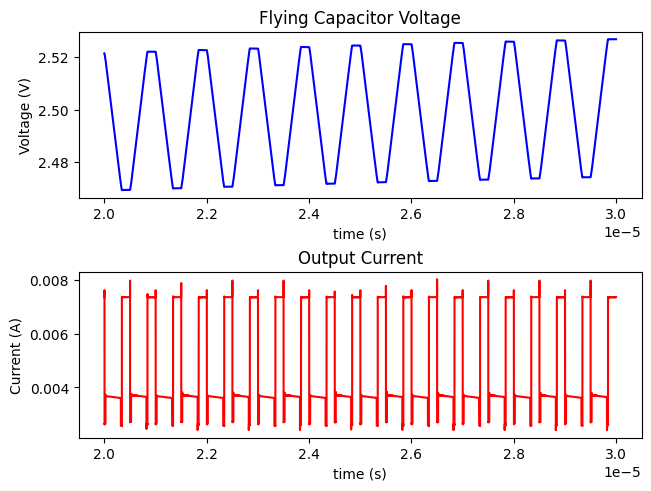

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv('input_files/SPICE_files/core/core_nofilter.txt',delim_whitespace=True, header=None,names=['t', 'v', 't1', 'i1','t2','v2','t3','i3']).values


i=0
for number in data:
    if round(number[0],13)==0.00002:
        row1=i
    if round(number[0],13)==0.00003:
        row2=i
        i+=1
        break
    i+=1

v_out = data[row1:row2,1]
i_in = (-1)*data[row1:row2,3]
i_out = data[row1:row2,5]
v_flying = data[row1:row2,7]
vout = np.mean(v_out)
iin = np.mean(i_in)
iout = np.mean(i_out)
print('Output voltage:',vout,'V')
print('Output current:',iout,'A')
pout = vout*iout
vin=5
pin = vin*iin
pre_layout_sim_eff = (pout/pin)*(100)
print('Efficiency',pre_layout_sim_eff)
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(data[row1:row2,0],v_flying,color='b')
axs[0].set_title('Flying Capacitor Voltage')
axs[0].set_xlabel('time (s)')
axs[0].set_ylabel('Voltage (V)')

axs[1].plot(data[row1:row2,0],i_out,color='r')
axs[1].set_xlabel('time (s)')
axs[1].set_title('Output Current')
axs[1].set_ylabel('Current (A)')



plt.show()



As a comparison, a simulation with a passive filter is available to be generated in the block below. It is worth noting that the filter was optimally designed for a $22 \Omega$ load $@ 1MHz$ implementation. 

In [40]:
!ngspice input_files/SPICE_files/core/core_sim_wfilter.spice -a

******
** ngspice-40 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2023, The ngspice team.
** Please get your ngspice manual from https://ngspice.sourceforge.io/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 27 23:20:44 UTC 2023
******

Note: No compatibility mode selected!


Circuit: 

Reset re-loads circuit 

Circuit: 

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
vss                                          0
vh                                           5
net1                                         3
vdig                                       1.8
d3_s                                         0
d2_s                                         0
d4_s            

Output current (desired output): 0.004760909507849803 A
Efficiency (at desired current output): 91.78613190511633 %


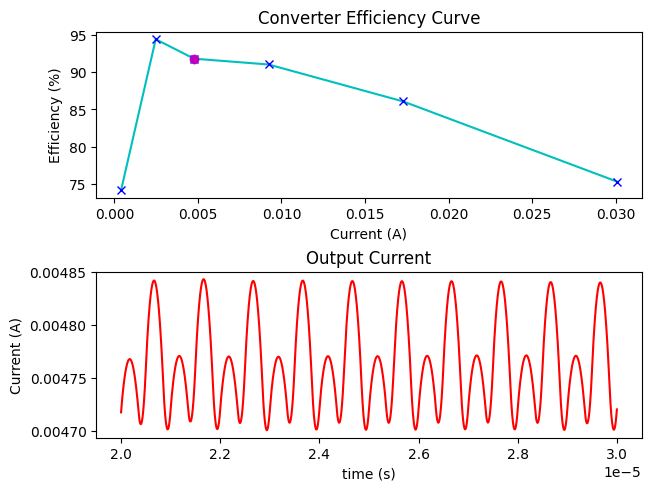

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.signal import find_peaks

data = pd.read_csv('input_files/SPICE_files/core/core_wfilter.txt',delim_whitespace=True, header=None,names=['t', 'v', 't1', 'i1','t2','v2','t3','i','o','g']).values
eff_arr=[]
curr_arr=[]
r=[1,2,3,4,5,6]
indices=[]
for res in r:
    i=0
    for number in data:
        if round(number[0],13)==0.00002 and i not in indices:
            row1=i
            indices.append(i)
        if round(number[0],13)==0.00003 and i not in indices:
            row2=i
            indices.append(i)
            break
        i+=1
    v_out = data[row1:row2,1]
    i_in = (-1)*data[row1:row2,3]
    i_out = data[row1:row2,7]
    vout = np.mean(v_out)
    iin = np.mean(i_in)
    iout = np.mean(i_out)
    pout = vout*iout
    vin=5
    pin = vin*iin
    filter_eff = (pout/pin)*(100)
    if res==3:
        pre_lay_sis_filter_eff=filter_eff
        pre_lay_sis_filter_curr=iout
        curr_trace=i_out
        time=data[row1:row2,6]
    eff_arr.append(filter_eff)
    curr_arr.append(iout)
print('Output current (desired output):',pre_lay_sis_filter_curr,'A')
print('Efficiency (at desired current output):',pre_lay_sis_filter_eff,'%')

fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(curr_arr,eff_arr,color='c')
axs[0].plot(curr_arr,eff_arr,'bx')
axs[0].plot(pre_lay_sis_filter_curr,pre_lay_sis_filter_eff,'mo')
axs[0].set_title('Converter Efficiency Curve')
axs[0].set_xlabel('Current (A)')
axs[0].set_ylabel('Efficiency (%)')

axs[1].plot(time,curr_trace,color='r')
axs[1].set_xlabel('time (s)')
axs[1].set_title('Output Current')
axs[1].set_ylabel('Current (A)')
plt.show()

As expected, the current has a more balanced output thanks to the filter. Also, with the efficiency characteristic curve, a decision for a better design can be made by seeing the current points that give the best efficiencies. This may be achieved by making a bigger converter that will have better switching resistance or by varying the desired current output. Other options are changing the switching frequency. The magenta point shows the design that was made by the user.

In [42]:
from tabulate import tabulate
data = [["Pre-Layout (Device Estimation)", pre_lay_dev_eff], 
        ["Post-Layout (Device Estimation)", post_lay_dev_eff], 
        ["Pre-Layout (no filter)", pre_layout_sim_eff],
        ["Pre-Layout (with filter)", pre_lay_sis_filter_eff]]
  
#define header names
col_names = ["Data for "+str(native_iout)+" mA output", "Efficiency (%)", "Conduction Losses (%)", "Gate Charge Losses (%)"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════════════════╤══════════════════╕
│ Data for 5.0 mA output          │   Efficiency (%) │
╞═════════════════════════════════╪══════════════════╡
│ Pre-Layout (Device Estimation)  │          95.6801 │
├─────────────────────────────────┼──────────────────┤
│ Post-Layout (Device Estimation) │          95.5684 │
├─────────────────────────────────┼──────────────────┤
│ Pre-Layout (no filter)          │          80.5661 │
├─────────────────────────────────┼──────────────────┤
│ Pre-Layout (with filter)        │          91.7861 │
╘═════════════════════════════════╧══════════════════╛


The difference between device estimations and system simulations is easily seen. This is mainly because of the passive load instead of a constant current load and because of dynamic losses. The device estimations consider the gate charge losses, but not the ones related to the device's switching. This is one of the biggest sources of losses and thus, the divergence between both figures.

#### 4.3.2 Automated System Layout

#### The following command block will build the **.tcl** file to make the converter layout

In [51]:
# Power Stage .tcl
tcl_file=open('input_files/mag_files/power_stage.tcl','r')
data=[]
for line in tcl_file:
    data.append(line)
tcl_file.close()
data[25]='tech load '+PDK_ROOT+'/sky130A/libs.tech/magic/sky130A.tech\n'
data[29]='set n_nmos '+str(n_cell)+'\n'
data[30]='set n_pmos '+str(p_cell)+'\n'
data[34]='getcell input_files/mag_files/nmos_waffle_'+str(n_cell)+'x'+str(n_cell)+'\n'
data[44]='getcell input_files/mag_files/nmos_waffle_'+str(n_cell)+'x'+str(n_cell)+'\n'
data[55]='getcell input_files/mag_files/pmos_waffle_'+str(p_cell)+'x'+str(p_cell)+'\n'
data[67]='getcell input_files/mag_files/pmos_waffle_'+str(p_cell)+'x'+str(p_cell)+'\n'
tcl_file=open('input_files/mag_files/power_stage.tcl','w')
for line in data:
    tcl_file.write(line)
tcl_file.close()

# Core .tcl
tcl_file=open('input_files/mag_files/core.tcl','r')
data=[]
for line in tcl_file:
    data.append(line)
tcl_file.close()
data[8]='tech load '+PDK_ROOT+'/sky130A/libs.tech/magic/sky130A.tech\n'
data[9]='set n_cell '+str(n_cell)+'\n'
data[10]='set p_cell '+str(p_cell)+'\n'
tcl_file=open('input_files/mag_files/core.tcl','w')
for line in data:
    tcl_file.write(line)
tcl_file.close()

#### The next two command lines will run the **.tcl** files to make the layout for the converter core

In [44]:
!PDKPATH="${PDK_ROOT}/sky130A" magic -dnull -noconsole input_files/mag_files/power_stage.tcl


Magic 8.3 revision 388 - Compiled on Sun Mar 26 23:19:03 UTC 2023.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Loading "input_files/mag_files/power_stage.tcl" from command line.
"drc(full)" is not one of the DRC styles Magic knows.
The current style is "default".
The DRC styles are: default.
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (units^2)

microns:  10.000 x 10.000  ( 0.000,  0.000), ( 10.000,  10.000)  100.000   
lambda:     1000 x 1000    (     0,  0    ), (  1000,  1000 )  1000000   
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (units^2)

microns:  19.620 x 3.000   ( 30.000,  57.000), ( 49.620,  60.000)  58.860    
lambda:     1962 x 300     (  3000,  5700 ), (  

In [52]:
!PDKPATH="${PDK_ROOT}/sky130A" magic -dnull -noconsole input_files/mag_files/core.tcl


Magic 8.3 revision 388 - Compiled on Sun Mar 26 23:19:03 UTC 2023.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Loading "input_files/mag_files/core.tcl" from command line.
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
DRC style is now "drc(full)"
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (units^2)

microns:  10.000 x 10.000  ( 0.000,  0.000), ( 10.000,  10.000)  100.000   
lambda:     1000 x 1000    (     0,  0    ), (  1000,  1000 )  1000000   
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (units^2)

microns:  592.000 x 3.000   ( 10.000,  183.500), ( 602.000,  186.500)  1776.000  
lambda:    59200 x 300     (  1000,  18350), ( 60200,  18650)  17760000  
Root cell box:
           width x height  (   llx,  lly  ), (  